<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/KD_Initial_r2_nofilter_disserta%C3%A7%C3%A3o_working.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

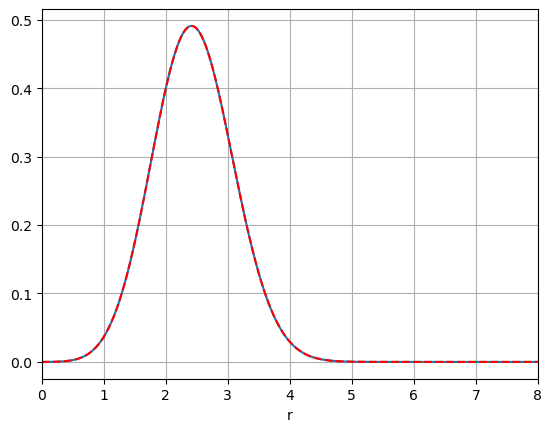

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

N = 200                                                   # Truncation ordem

L0 = 2                                              # Map parameter

col = np.cos(np.arange(2*N + 4)*math.pi /(2*N + 3))      # collocation points (Verificado)

colr = col[1:N+2]

r1 = L0 * colr/(np.sqrt(1-colr**2))                       # physical domain (Verificado)
r = np.flip(r1)

#out_r = open('r_30_L02.txt', 'a')
#out_r.write(' ' +' '.join(str('%.18f'%n) for n in r)+'\n')
#out_r.close()


# Base Matrix (Tchebyshev Polinomials):

SB = np.zeros([N+3,N+1])
rSB = np.zeros([N+3,N+1])
rrSB = np.zeros([N+3,N+1])


for i in range(N+1+1+1):
  SB[i,] = np.sin((2*i+1)*np.arctan(L0/r))

for i in range(N+1+1+1):
  rSB[i,] = -np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1+1+1):
  rrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/r))*(2*i+1)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+1)*np.arctan(L0/r))*(2*i+1)*L0**3/(r**5*(1+L0**2/r**2)**2)


psi = SB[0:N+1,:]        # Base function
rpsi = rSB[0:N+1,:]
rrpsi = rrSB[0:N+1,:]

# Initial conditions of Phi (Scalar field)

r0 = 2

sigma = 1

A0 = 0.1   # 0.09 -> disperses ; 0.09 -> colapse

Phi_0 = A0*r**2*(np.exp(-(r-r0)**2/sigma**2)+np.exp(-(r+r0)**2/sigma**2))            # Phi initial data (Verificado)

inv_psi = np.linalg.inv(psi)

a0 = np.dot(Phi_0, inv_psi)  # coeficients a(0)  (Verificado)

#out_a = open('a0_30_L02.txt', 'a')
#out_a.write(' ' +' '.join(str('%.18f'%n) for n in a0)+'\n')
#out_a.close()


Phi = np.dot(a0, psi)        # approximative solution in t = 0
rPhi= np.dot(a0, rpsi)

########################### Plot: Initial Conditions of Phi

M = 3000       # plot truncation

rplot = np.linspace(0.000001,10,M)

colplot = rplot/np.sqrt(L0**2 + rplot**2)

SBplot = np.zeros([N+1,M])
rSBplot = np.zeros([N+1,M])
rrSBplot = np.zeros([N+1,M])

for i in range(N+1):
  SBplot[i,] = np.sin((2*i+1)*np.arctan(L0/rplot))

for i in range(N+1):
  rSBplot[i,] = -np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**2*(1+L0**2/rplot**2))

for i in range(N+1):
  rrSBplot[i,] = -np.sin((2*i+1)*np.arctan(L0/rplot))*(2*i+1)**2*L0**2/(rplot**4*(1+L0**2/rplot**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0/(rplot**3*(1+L0**2/rplot**2))-2*np.cos((2*i+1)*np.arctan(L0/rplot))*(2*i+1)*L0**3/(rplot**5*(1+L0**2/rplot**2)**2)

psiplot = SBplot[0:(N+1),:]
rpsiplot = rSBplot[0:(N+1),:]
rrpsiplot = rrSBplot[0:(N+1),:]

Phi_plot0 = A0*rplot**2*(np.exp(-(rplot-r0)**2/sigma**2)+np.exp(-(rplot+r0)**2/sigma**2))

Phiplot = np.dot(a0, psiplot)

erro = Phi_plot0 - Phiplot

plt.plot(rplot, Phiplot, rplot, Phi_plot0, "--r")   #(Verificado)
plt.xlabel('r')
plt.xlim(0,8)
plt.grid()
plt.show()




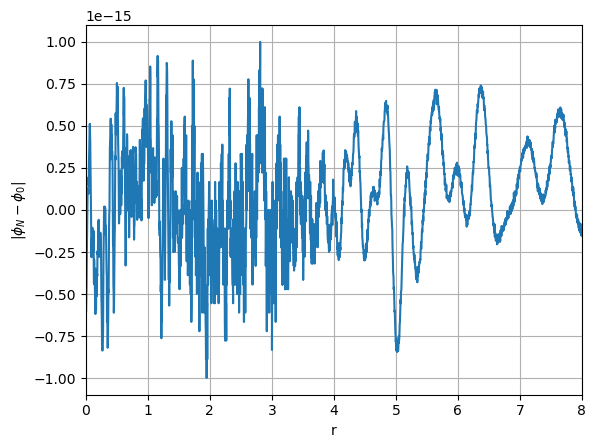

In [6]:
plt.plot(rplot, erro)
plt.xlabel('r')
plt.xlim(0,8)
plt.ylabel("$|\phi_N - \phi_0|$")
plt.grid()
plt.show()

In [7]:
# Initial conditions for Alpha:

alpha0 = 1 - A0*(np.exp(-(r-r0)**2/sigma**2) + np.exp(-(r+r0)**2/sigma**2))

al0 = np.dot(alpha0 - 1, inv_psi)

# Initial values of Krr and K:

# Base functions:

SB1 = 1/2*(SB[1:(N+2),:] + SB[0:(N+1),:])          # VERIFICADO
rSB1 = 1/2*(rSB[1:(N+2),:] + rSB[0:(N+1),:])
rrSB1 = 1/2*(rrSB[1:(N+2),:] + rrSB[0:(N+1),:])

inv_SB1 = np.linalg.inv(SB1)

K0 = A0/20*r**2*(np.exp(-(r)**2/sigma**2) + np.exp(-(r)**2/sigma**2))

fk0 = np.dot(K0, inv_SB1)

K = np.dot(fk0, SB1)

Pi_0 = np.zeros(N+1)
b0 = np.dot(Pi_0, psi)
Pi = np.dot(b0, psi)

c0 = np.zeros([N+1])     # guess value
for i in range(N+1):
  c0[i]  =   0.001

N_int = 50

tol = 1e-18    # tolerance

n = 0
nf = 50

# Newton Raphson loop:

while n <= nf:
  Chi = np.dot(c0, psi)
  rChi = np.dot(c0 ,rpsi)
  rrChi = np.dot(c0, rrpsi)
  H0 = 4*rChi**2 + 4*rrChi + 8/r*rChi - np.exp(4*Chi)*K**2/4 + 1/2*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2)
  J1 = rChi*rpsi
  JH = 8*J1 + 4*rrpsi + 8/r*rpsi + 4*psi*np.exp(4*Chi)*K/4 - 2*psi*np.exp(4*Chi)*(Pi**2 + np.exp(-4*Chi)*rPhi**2) + 1/2*np.exp(4*Chi)*(4*psi*np.exp(-4*Chi)*rPhi**2)
  inv_JH = np.linalg.inv(JH)
  cnew = c0 - np.dot(H0, inv_JH)
  err = abs(c0 - cnew)
#  print(max(err))
  if  max(err) <= tol:
    break
  c0 = cnew    
  n = n + 1


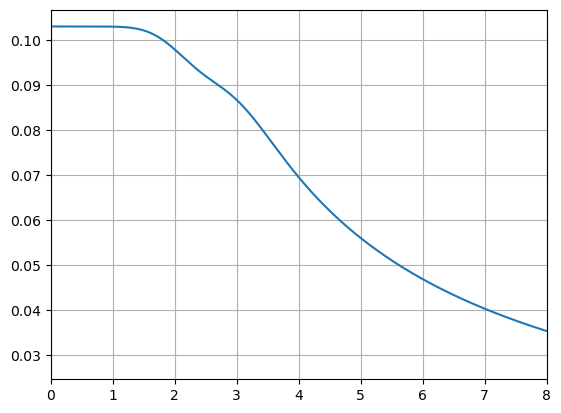

In [8]:

Chiplot = np.dot(c0, psiplot)

rrChiplot = np.dot(c0, rrpsiplot)

plt.plot(rplot,Chiplot)
plt.xlim(0,8)
plt.grid()
plt.show()

Field equations

In [9]:
# Base functions for Beta

SB2 = np.zeros([N+1,N+1])
rSB2 = np.zeros([N+1,N+1])
rrSB2 = np.zeros([N+1,N+1])

for i in range(N+1):                                                   # VERIFICADO
  SB2[i,] = np.sin((2*(i+1/2)+1)*np.arctan(L0/r))

for i in range(N+1):
  rSB2[i,] = -np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**2*(1+L0**2/r**2))

for i in range(N+1):
  rrSB2[i,] = -np.sin((2*i+2)*np.arctan(L0/r))*(2*i+2)**2*L0**2/(r**4*(1+L0**2/r**2)**2)+2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0/(r**3*(1+L0**2/r**2))-2*np.cos((2*i+2)*np.arctan(L0/r))*(2*i+2)*L0**3/(r**5*(1+L0**2/r**2)**2)



Quadrature Integration

In [10]:
Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq + 1)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

P = np.zeros([Nq+3,Nq+1])
colP = np.zeros([Nq+3,Nq+1])

P[0,] = 1
P[1,] = new_col

colP[0,] = 0
colP[1,] = 1

for i in range(2,Nq+3):
  P[i,] = ((2*i-1)*new_col*P[i-1,] - (i-1)*P[i-2,])/(i)

for i in range(2,Nq+3):
  colP[i,] = i*P[i-1] + new_col*colP[i-1]

P_max = P[Nq+1]

colP_max = colP[Nq+1]

wq_col = 2/((1-new_col**2)*colP_max**2)    # Legendre weight (Verificado)

rq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain

qSB = np.zeros([Nq+3,Nq+1])                # Base function in quadrature points
qrSB = np.zeros([Nq+3,Nq+1])
qrrSB = np.zeros([Nq+3,Nq+1])




for i in range(Nq+1+1+1):
  qSB[i,] = np.sin((2*i+1)*np.arctan(L0/rq))

for i in range(Nq+1+1+1):
  qrSB[i,] = -np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**2*(1+L0**2/rq**2))

for i in range(Nq+1+1+1):
  qrrSB[i,] = -np.sin((2*i+1)*np.arctan(L0/rq))*(2*i+1)**2*L0**2/(rq**4*(1+L0**2/rq**2)**2)+2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0/(rq**3*(1+L0**2/rq**2))-2*np.cos((2*i+1)*np.arctan(L0/rq))*(2*i+1)*L0**3/(rq**5*(1+L0**2/rq**2)**2)


qpsi = qSB[0:N+1,:]
rqpsi = qrSB[0:N+1,:]
rrqpsi = qrrSB[0:N+1,:]


# Initial Phi in quadrature points

#qPhi = np.dot(a0, qpsi)
#rqPhi= np.dot(a0, rqpsi)

# Initial Pi for quadrature points

#qPi = np.dot(b0, qpsi)


# Initial Chi for quadrature points:

#qChi = np.dot(c0, qpsi)   # Verificado todos
#rqChi = np.dot(c0, rqpsi)
#rrqChi = np.dot(c0, rrqpsi)

# Initial values of Krr:


qSB1 = 1/2*(qSB[1:(N+2),:] + qSB[0:(N+1),:])          # VERIFICADO
rqSB1 = 1/2*(qrSB[1:(N+2),:] + qrSB[0:(N+1),:])
rrqSB1 = 1/2*(qrrSB[1:(N+2),:] + qrrSB[0:(N+1),:])


#qKrr = np.dot(ck0, qSB1)

# Alpha na origem

psi_0 = np.zeros(N+1)     #psi(t,0)

for i in range(N+1):
  psi_0[i,] = np.sin((2*i+1)*math.pi/2)     # arccot(0) = Pi/2

#Alpha_0 = 1 + np.dot(al0, psi_0)

In [11]:
# Filtering

Nc = 0

Nf = N - Nc

coef_f = 36
s = 10

filter1 = np.ones(N+1)
#filter1 = np.exp(- coef_f*((np.arange(N - Nc + 1))/(N-Nc))**s)

In [19]:
# Runge Kutta 4th order

h = 0.0002   # step size
tf = 7

It = int(tf/h)

t = 0

epsilon0 = 1
eta0 = 1

Madm_error = []
Alpha_origin = []
phi_origin = []
L2HC = []
L2MC = []
phi_set = []

out_a = open('Alpha_origin.txt', 'a')
out_a.truncate(0)                        # arase the old datas and start the new ones

out_p = open('phi_origin.txt', 'a')
out_p.truncate(0)

V = 0

M0 = 2*np.dot(np.arange(1, 2*N + 2, 2), c0) # Madm(t = 0)

#np.random.seed(123)

while t <= tf:

  # First step
  Phi = np.dot(a0, psi)
  rPhi = np.dot(a0, rpsi)
  rrPhi = np.dot(a0, rrpsi)

  Pi = np.dot(b0, psi)
  rPi= np.dot(b0, rpsi)

  Chi = np.dot(c0, psi)
  rChi = np.dot(c0, rpsi)
  rrChi = np.dot(c0, rrpsi)

  Alpha = 1 + np.dot(al0, psi)
  rAlpha = np.dot(al0, rpsi)
  rrAlpha = np.dot(al0, rrpsi)

  K = np.dot(fk0, SB1)
  rK = np.dot(fk0, rSB1)

  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1   
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)
    
  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K1 = h*(dc)
  L1 = h*(da)
  N1 = h*(db)
  M1 = h*(dal)
  P1 = h*(dfk)

  # L2-error associated to the Hamiltonian constraint
  qPhi = np.dot(a0, qpsi)
  rqPhi= np.dot(a0, rqpsi)
  qPi = np.dot(b0, qpsi)
  qChi = np.dot(c0, qpsi)
  rqChi = np.dot(c0, rqpsi)
  rrqChi = np.dot(c0, rrqpsi)
  qKrr = np.dot(ck0, qSB1)
  qK = np.dot(fk0, qSB1)
  H = 4*rqChi**2 + 4*rrqChi + 8/rq*rqChi + 3/4*np.exp(-4*qChi)*qKrr**2 - 1/4*np.exp(4*qChi)*qK**2 + 1/2*np.exp(4*qChi)*(qPi**2 + np.exp(-4*qChi)*rqPhi**2) - qK*qKrr/2
  L2 = (1/2*np.dot(H**2,wq_col))**1/2
  L2HC.append(L2)    # L2 error of HC

  # L2-error associated to the momentum constraint
#  rqKrr = np.dot(ck0, rqSB1)
#  M = 2*rqChi*qKrr + rqKrr + 3/rq*qKrr + qPi*rqPhi*np.exp(4*qChi)
#  L2MC.append((1/2*np.dot(M**2,wq_col))**1/2)    # L2 error of HC

  # Alpha origin
  Alpha_0 = 1 + np.dot(al0, psi_0)
  Alpha_origin.append(Alpha_0)                   # = Alphacenter in matlab
  out_a.write(str(t) + " " + str(Alpha_0))
  out_a.write(',\n')

  # Phi origin:
  phi_0 = np.dot(a0, psi_0)
  phi_origin.append(phi_0)
  out_p.write(str(t) + " " + str(phi_0))
  out_p.write(',\n')

  # Error ADM mass:
  Madm = 2*np.dot(np.arange(1, 2*N + 2, 2), c0)
  Madm_pc = abs(Madm - M0)/M0 * 100
  Madm_error.append(Madm_pc)

  # Second step
  Phi = np.dot(a0 + L1/2, psi)
  rPhi= np.dot(a0 + L1/2 , rpsi)
  rrPhi = np.dot(a0 + L1/2, rrpsi)

  Pi = np.dot(b0 + N1/2, psi)
  rPi= np.dot(b0 + N1/2, rpsi)

  Chi = np.dot(c0 + K1/2, psi)
  rChi = np.dot(c0 + K1/2, rpsi)
  rrChi = np.dot(c0 + K1/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M1/2, psi)
  rAlpha = np.dot(al0 + M1/2, rpsi)
  rrAlpha = np.dot(al0 + M1/2, rrpsi)

  K = np.dot(fk0 + P1/2, SB1)
  rK = np.dot(fk0 + P1/2, rSB1)

  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K2 = h*(dc)
  L2 = h*(da)
  N2 = h*(db)
  M2 = h*(dal)
  P2 = h*(dfk)

  # Third step
  Phi = np.dot(a0 + L2/2, psi)
  rPhi = np.dot(a0 + L2/2 , rpsi)
  rrPhi = np.dot(a0 + L2/2, rrpsi)

  Pi = np.dot(b0 + N2/2, psi)
  rPi= np.dot(b0 + N2/2, rpsi)

  Chi = np.dot(c0 + K2/2, psi)
  rChi = np.dot(c0 + K2/2, rpsi)
  rrChi = np.dot(c0 + K2/2, rrpsi)

  Alpha = 1 + np.dot(al0 + M2/2, psi)
  rAlpha = np.dot(al0 + M2/2, rpsi)
  rrAlpha = np.dot(al0 + M2/2, rrpsi)

  K = np.dot(fk0 + P2/2, SB1)
  rK = np.dot(fk0 + P2/2, rSB1)

  Matrix_Krr = 2*rChi*SB1 + rSB1 + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K3 = h*(dc)
  L3 = h*(da)
  N3 = h*(db)
  M3 = h*(dal)
  P3 = h*(dfk)

  # Forth step
  Phi = np.dot(a0 + L3, psi)
  rPhi= np.dot(a0 + L3 , rpsi)
  rrPhi = np.dot(a0 + L3, rrpsi)

  Pi = np.dot(b0 + N3, psi)
  rPi= np.dot(b0 + N3, rpsi)

  Chi = np.dot(c0 + K3, psi)
  rChi = np.dot(c0 + K3, rpsi)
  rrChi = np.dot(c0 + K3, rrpsi)

  Alpha = 1 + np.dot(al0 + M3, psi)
  rAlpha = np.dot(al0 + M3, rpsi)
  rrAlpha = np.dot(al0 + M3, rrpsi)

  K = np.dot(fk0 + P3, SB1)
  rK = np.dot(fk0 + P3, rSB1)

  Matrix_Krr = 2*rChi*SB1  + rSB1  + 3/r*SB1   # (p, p)
  inv_matrix_krr = np.linalg.inv(Matrix_Krr)
  rhsk = (1 + 2*r*rChi)*np.exp(4*Chi)*K/r + np.exp(4*Chi)*rK - Pi*rPhi*np.exp(4*Chi)
  ck0 = np.dot(rhsk, inv_matrix_krr)
  Krr = np.dot(ck0, SB1)
  rKrr = np.dot(ck0, rSB1)

  Matrix_Beta = rSB2 - SB2/r
  inv_matrix_beta = np.linalg.inv(Matrix_Beta)
  rhsbe = 3/2*Alpha*np.exp(-4*Chi)*Krr - 1/2*Alpha*K
  be0 = np.dot(rhsbe , inv_matrix_beta)
  Beta = np.dot(be0, SB2)
  rBeta = np.dot(be0, rSB2)

  dal = np.dot(epsilon0*(rrAlpha + rAlpha*(2/r + 2*rChi))*np.exp(-4*Chi) - epsilon0*Alpha*(1.5*np.exp(-8*Chi)*Krr**2 + 0.5*K**2 - np.exp(-4*Chi)*K*Krr) - epsilon0*Alpha*Pi**2 - epsilon0*Beta*rK - epsilon0*eta0*K, inv_psi)
  db = np.dot(Beta*rPi + np.exp(-4*Chi)*rPhi*(2*Alpha/r + 2*Alpha*rChi) + np.exp(-4*Chi)*(Alpha*rrPhi + rAlpha*rPhi) + Alpha*K*Pi, inv_psi)
  dc = np.dot(1/2*rBeta + Beta*rChi - 1/2*Alpha*np.exp(-4*Chi)*Krr, inv_psi)
  da = np.dot(Alpha*Pi + Beta*rPhi, inv_psi)
  dfk = np.dot(-eta0*K, inv_SB1)
  K4 = h*(dc)
  L4 = h*(da)
  N4 = h*(db)
  M4 = h*(dal)
  P4 = h*(dfk)

  t = t + h
  print(f'max(al0) = {max(al0)}' )
#  print(f't = {t}')

  # Evolution functions
  a0 = filter1*(a0 + 1/6 * (L1 + 2*L2 + 2*L3 + L4))
  b0 = filter1*(b0 + 1/6 * (N1 + 2*N2 + 2*N3 + N4))
  c0 = filter1*(c0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4))
  al0 = al0 + 1/6 * (M1 + 2*M2 + 2*M3 + M4)
  fk0 = fk0 + 1/6 * (P1 + 2*P2 + 2*P3 + P4)

  phi_set.append(np.dot(a0, psiplot))

t1 = np.linspace(0, tf, len(Alpha_origin))




max(al0) = 0.021051995496395536
max(al0) = 0.021017385046336007
max(al0) = 0.020982734784518873
max(al0) = 0.0209480456542619
max(al0) = 0.02091331859389831
max(al0) = 0.0208785545367449
max(al0) = 0.02084375441107139
max(al0) = 0.020808919140071037
max(al0) = 0.020774049641832413
max(al0) = 0.020739146829312438
max(al0) = 0.020704211610310563
max(al0) = 0.020669244887444104
max(al0) = 0.020634247558124756
max(al0) = 0.020599220514536196
max(al0) = 0.020564164643612822
max(al0) = 0.020529080827019566
max(al0) = 0.020493969941132794
max(al0) = 0.020458832857022262
max(al0) = 0.020423670440434104
max(al0) = 0.020388483551774854
max(al0) = 0.02035327304609646
max(al0) = 0.020318039773082313
max(al0) = 0.02028278457703422
max(al0) = 0.020247508296860353
max(al0) = 0.020212211766064136
max(al0) = 0.020176895812734047
max(al0) = 0.020141561259534334
max(al0) = 0.020106208923696627
max(al0) = 0.02007083961701242
max(al0) = 0.02003545414582641
max(al0) = 0.020000053311030698
max(al0) = 0.01996

max(al0) = 0.02441090591567206
max(al0) = 0.024426153660959498
max(al0) = 0.024441341844585525
max(al0) = 0.02445647056525438
max(al0) = 0.02447153992219848
max(al0) = 0.024486550015170656
max(al0) = 0.02450150094443641
max(al0) = 0.024516392810766275
max(al0) = 0.024531225715428227
max(al0) = 0.02454599976018017
max(al0) = 0.024560715047262476
max(al0) = 0.02457537167939059
max(al0) = 0.02458996975974772
max(al0) = 0.024604509391977555
max(al0) = 0.024618990680177085
max(al0) = 0.024633413728889456
max(al0) = 0.0246477786430969
max(al0) = 0.024662085528213726
max(al0) = 0.024676334490079374
max(al0) = 0.02469052563495152
max(al0) = 0.024704659069499257
max(al0) = 0.024718734900796333
max(al0) = 0.024732753236314433
max(al0) = 0.02474671418391655
max(al0) = 0.024760617851850387
max(al0) = 0.024774464348741837
max(al0) = 0.02478825378358851
max(al0) = 0.024801986265753324
max(al0) = 0.024815661904958156
max(al0) = 0.024829280811277544
max(al0) = 0.024842843095132447
max(al0) = 0.0248563

max(al0) = 0.026840069521441523
max(al0) = 0.02684245976932303
max(al0) = 0.026844824867406657
max(al0) = 0.026847164909481303
max(al0) = 0.02684947998914046
max(al0) = 0.02685177019978223
max(al0) = 0.026854035634609367
max(al0) = 0.026856276386629296
max(al0) = 0.026858492548654158
max(al0) = 0.026860684213300852
max(al0) = 0.026862851472991077
max(al0) = 0.026864994419951393
max(al0) = 0.026867113146213262
max(al0) = 0.026869207743613118
max(al0) = 0.026871278303792427
max(al0) = 0.026873324918197748
max(al0) = 0.026875347678080808
max(al0) = 0.026877346674498575
max(al0) = 0.026879321998313346
max(al0) = 0.026881273740192814
max(al0) = 0.026883201990610166
max(al0) = 0.026885106839844162
max(al0) = 0.02688698837797924
max(al0) = 0.026888846694905603
max(al0) = 0.026890681880319327
max(al0) = 0.02689249402372246
max(al0) = 0.026894283214423133
max(al0) = 0.02689604954153567
max(al0) = 0.026897793093980698
max(al0) = 0.026899513960485275
max(al0) = 0.026901212229583
max(al0) = 0.0269

max(al0) = 0.026804613553826448
max(al0) = 0.026802911512799954
max(al0) = 0.02680120409147999
max(al0) = 0.02679949133665338
max(al0) = 0.02679777329498728
max(al0) = 0.026796050013029465
max(al0) = 0.026794321537208614
max(al0) = 0.026792587913834605
max(al0) = 0.026790849189098798
max(al0) = 0.026789105409074317
max(al0) = 0.02678735661971634
max(al0) = 0.026785602866862386
max(al0) = 0.0267838441962326
max(al0) = 0.026782080653430032
max(al0) = 0.02678031228394092
max(al0) = 0.026778539133134986
max(al0) = 0.02677676124626571
max(al0) = 0.026774978668470603
max(al0) = 0.02677319144477151
max(al0) = 0.02677139962007487
max(al0) = 0.026769603239172022
max(al0) = 0.026767802346739453
max(al0) = 0.026765996987339107
max(al0) = 0.026764187205418646
max(al0) = 0.026762373045311743
max(al0) = 0.02676055455123835
max(al0) = 0.026758731767304974
max(al0) = 0.026756904737504965
max(al0) = 0.026755073505718784
max(al0) = 0.026753238115714284
max(al0) = 0.026751398611146986
max(al0) = 0.026749

max(al0) = 0.02623847605412251
max(al0) = 0.026236780124889746
max(al0) = 0.02623508844342984
max(al0) = 0.026233401031625667
max(al0) = 0.02623171791130268
max(al0) = 0.02623003910422907
max(al0) = 0.0262283646321159
max(al0) = 0.02622669451661724
max(al0) = 0.02622502877933033
max(al0) = 0.02622336744179569
max(al0) = 0.026221710525497283
max(al0) = 0.026220058051862644
max(al0) = 0.026218410042263024
max(al0) = 0.02621676651801353
max(al0) = 0.026215127500373258
max(al0) = 0.026213493010545433
max(al0) = 0.026211863069677557
max(al0) = 0.02621023769886153
max(al0) = 0.026208616919133794
max(al0) = 0.02620700075147548
max(al0) = 0.026205389216812525
max(al0) = 0.026203782336015825
max(al0) = 0.02620218012990136
max(al0) = 0.026200582619230334
max(al0) = 0.026198989824709307
max(al0) = 0.026197401766990334
max(al0) = 0.026195818466671093
max(al0) = 0.026194239944295022
max(al0) = 0.026192666220351456
max(al0) = 0.02619109731527575
max(al0) = 0.02618953324944942
max(al0) = 0.0261879740

max(al0) = 0.025997936967529507
max(al0) = 0.025998185481507743
max(al0) = 0.02599844264584555
max(al0) = 0.02599870847042355
max(al0) = 0.02599898296509298
max(al0) = 0.025999266139675774
max(al0) = 0.025999558003964605
max(al0) = 0.025999858567722956
max(al0) = 0.026000167840685182
max(al0) = 0.02600048583255657
max(al0) = 0.026000812553013394
max(al0) = 0.026001148011702994
max(al0) = 0.026001492218243816
max(al0) = 0.026001845182225484
max(al0) = 0.026002206913208863
max(al0) = 0.026002577420726113
max(al0) = 0.02600295671428075
max(al0) = 0.02600334480334771
max(al0) = 0.026003741697373406
max(al0) = 0.02600414740577579
max(al0) = 0.02600456193794441
max(al0) = 0.026004985303240472
max(al0) = 0.0260054175109969
max(al0) = 0.02600585857051839
max(al0) = 0.026006308491081473
max(al0) = 0.026006767281934573
max(al0) = 0.026007234952298067
max(al0) = 0.026007711511364343
max(al0) = 0.026008196968297856
max(al0) = 0.026008691332235188
max(al0) = 0.026009194612285104
max(al0) = 0.026009

max(al0) = 0.02642573689417503
max(al0) = 0.026428669228553327
max(al0) = 0.02643161200921561
max(al0) = 0.026434565239777368
max(al0) = 0.02643752892383677
max(al0) = 0.026440503064974707
max(al0) = 0.02644348766675482
max(al0) = 0.026446482732723518
max(al0) = 0.026449488266410023
max(al0) = 0.02645250427132639
max(al0) = 0.026455530750967536
max(al0) = 0.026458567708811272
max(al0) = 0.026461615148318334
max(al0) = 0.0264646730729324
max(al0) = 0.02646774148608014
max(al0) = 0.026470820391171223
max(al0) = 0.026473909791598353
max(al0) = 0.026477009690737307
max(al0) = 0.026480120091946956
max(al0) = 0.026483240998569288
max(al0) = 0.026486372413929444
max(al0) = 0.026489514341335747
max(al0) = 0.026492666784079726
max(al0) = 0.026495829745436145
max(al0) = 0.026499003228663033
max(al0) = 0.02650218723700171
max(al0) = 0.026505381773676815
max(al0) = 0.026508586841896335
max(al0) = 0.026511802444851636
max(al0) = 0.026515028585717484
max(al0) = 0.026518265267652077
max(al0) = 0.0265

max(al0) = 0.02761094414775163
max(al0) = 0.0276167886318484
max(al0) = 0.027622643991635124
max(al0) = 0.02762851022691738
max(al0) = 0.027634387337489373
max(al0) = 0.027640275323133952
max(al0) = 0.02764617418362262
max(al0) = 0.027652083918715552
max(al0) = 0.02765800452816162
max(al0) = 0.027663936011698392
max(al0) = 0.027669878369052166
max(al0) = 0.027675831599937976
max(al0) = 0.027681795704059608
max(al0) = 0.027687770681109624
max(al0) = 0.027693756530769362
max(al0) = 0.027699753252708972
max(al0) = 0.027705760846587418
max(al0) = 0.027711779312052497
max(al0) = 0.027717808648740856
max(al0) = 0.02772384885627801
max(al0) = 0.027729899934278348
max(al0) = 0.027735961882345166
max(al0) = 0.027742034700070667
max(al0) = 0.027748118387035982
max(al0) = 0.02775421294281119
max(al0) = 0.027760318366955326
max(al0) = 0.027766434659016404
max(al0) = 0.027772561818531424
max(al0) = 0.0277786998450264
max(al0) = 0.02778484873801636
max(al0) = 0.02779100849700538
max(al0) = 0.0277971

max(al0) = 0.029624790453382645
max(al0) = 0.0296335828840618
max(al0) = 0.02964238575814968
max(al0) = 0.029651199072851794
max(al0) = 0.02966002282536589
max(al0) = 0.029668857012881963
max(al0) = 0.029677701632582248
max(al0) = 0.029686556681641257
max(al0) = 0.02969542215722577
max(al0) = 0.029704298056494854
max(al0) = 0.029713184376599873
max(al0) = 0.0297220811146845
max(al0) = 0.029730988267884718
max(al0) = 0.029739905833328847
max(al0) = 0.02974883380813755
max(al0) = 0.029757772189423822
max(al0) = 0.02976672097429304
max(al0) = 0.029775680159842936
max(al0) = 0.029784649743163635
max(al0) = 0.029793629721337644
max(al0) = 0.029802620091439882
max(al0) = 0.029811620850537675
max(al0) = 0.02982063199569078
max(al0) = 0.029829653523951383
max(al0) = 0.029838685432364117
max(al0) = 0.02984772771796607
max(al0) = 0.029856780377786798
max(al0) = 0.029865843408848337
max(al0) = 0.029874916808165203
max(al0) = 0.02988400057274442
max(al0) = 0.029893094699585506
max(al0) = 0.0299021

max(al0) = 0.03295322740330679
max(al0) = 0.03296518140745296
max(al0) = 0.03297714461827304
max(al0) = 0.032989117030984345
max(al0) = 0.033001098640799434
max(al0) = 0.03301308944292608
max(al0) = 0.033025089432567295
max(al0) = 0.03303709860492133
max(al0) = 0.03304911695518167
max(al0) = 0.03306114447853709
max(al0) = 0.033073181170171606
max(al0) = 0.033085227025264514
max(al0) = 0.0330972820389904
max(al0) = 0.033109346206519126
max(al0) = 0.033121419523015866
max(al0) = 0.033133501983641095
max(al0) = 0.033145593583550605
max(al0) = 0.03315769431789552
max(al0) = 0.03316980418182227
max(al0) = 0.03318192317047265
max(al0) = 0.0331940512789838
max(al0) = 0.033206188502488194
max(al0) = 0.0332183348361137
max(al0) = 0.03323049027498354
max(al0) = 0.033242654814216316
max(al0) = 0.03325482844892603
max(al0) = 0.033267011174222066
max(al0) = 0.03327920298520922
max(al0) = 0.0332914038769877
max(al0) = 0.03330361384465314
max(al0) = 0.0333158328832966
max(al0) = 0.03332806098800457
m

max(al0) = 0.037074783815021675
max(al0) = 0.037089342291430905
max(al0) = 0.03710390830138938
max(al0) = 0.03711848183900191
max(al0) = 0.03713306289837087
max(al0) = 0.03714765147359617
max(al0) = 0.03716224755877528
max(al0) = 0.03717685114800322
max(al0) = 0.0371914622353726
max(al0) = 0.0372060808149736
max(al0) = 0.037220706880893975
max(al0) = 0.037235340427219085
max(al0) = 0.03724998144803187
max(al0) = 0.03726462993741289
max(al0) = 0.03727928588944031
max(al0) = 0.0372939492981899
max(al0) = 0.037308620157735076
max(al0) = 0.03732329846214687
max(al0) = 0.03733798420549395
max(al0) = 0.03735267738184265
max(al0) = 0.037367377985256925
max(al0) = 0.03738208600979841
max(al0) = 0.037396801449526396
max(al0) = 0.03741152429849785
max(al0) = 0.037426254550767424
max(al0) = 0.037440992200387435
max(al0) = 0.0374557372414079
max(al0) = 0.037470489667876555
max(al0) = 0.037485249473838814
max(al0) = 0.03750001665333782
max(al0) = 0.03751479120041443
max(al0) = 0.03752957310910721
m

max(al0) = 0.04201866445340099
max(al0) = 0.042035300010971305
max(al0) = 0.04205194115087183
max(al0) = 0.04206858786674993
max(al0) = 0.04208524015225248
max(al0) = 0.04210189800102583
max(al0) = 0.042118561406715875
max(al0) = 0.042135230362968006
max(al0) = 0.04215190486342714
max(al0) = 0.042168584901737714
max(al0) = 0.04218527047154371
max(al0) = 0.042201961566488644
max(al0) = 0.04221865818021557
max(al0) = 0.0422353603063671
max(al0) = 0.04225206793858539
max(al0) = 0.04226878107051216
max(al0) = 0.042285499695788695
max(al0) = 0.04230222380805586
max(al0) = 0.04231895340095408
max(al0) = 0.04233568846812338
max(al0) = 0.04235242900320335
max(al0) = 0.04236917499983319
max(al0) = 0.04238592645165169
max(al0) = 0.04240268335229726
max(al0) = 0.042419445695407884
max(al0) = 0.0424362134746212
max(al0) = 0.04245298668357444
max(al0) = 0.04246976531590447
max(al0) = 0.04248654936524778
max(al0) = 0.04250333882524051
max(al0) = 0.04252013368951843
max(al0) = 0.04253693395171696
max

max(al0) = 0.04732149693162972
max(al0) = 0.0473395401070038
max(al0) = 0.04735758692825383
max(al0) = 0.04737563738910986
max(al0) = 0.04739369148330294
max(al0) = 0.04741174920456508
max(al0) = 0.0474298105466293
max(al0) = 0.04744787550322959
max(al0) = 0.047465944068100945
max(al0) = 0.04748401623497935
max(al0) = 0.04750209199760181
max(al0) = 0.04752017134970631
max(al0) = 0.047538254285031875
max(al0) = 0.04755634079731852
max(al0) = 0.04757443088030729
max(al0) = 0.04759252452774027
max(al0) = 0.047610621733360545
max(al0) = 0.04762872249091224
max(al0) = 0.04764682679414052
max(al0) = 0.047664934636791584
max(al0) = 0.04768304601261268
max(al0) = 0.04770116091535211
max(al0) = 0.04771927933875922
max(al0) = 0.0477374012765844
max(al0) = 0.04775552672257912
max(al0) = 0.04777365567049591
max(al0) = 0.04779178811408835
max(al0) = 0.047809924047111124
max(al0) = 0.04782806346331997
max(al0) = 0.04784620635647171
max(al0) = 0.047864352720324244
max(al0) = 0.047882502548636574
max(

max(al0) = 0.052324274826997655
max(al0) = 0.05234308071517924
max(al0) = 0.05236188859846318
max(al0) = 0.05238069847098127
max(al0) = 0.05239951032686728
max(al0) = 0.052418324160256886
max(al0) = 0.05243713996528772
max(al0) = 0.05245595773609935
max(al0) = 0.0524747774668333
max(al0) = 0.052493599151633034
max(al0) = 0.052512422784643964
max(al0) = 0.052531248360013466
max(al0) = 0.052550075871890874
max(al0) = 0.052568905314427476
max(al0) = 0.05258773668177653
max(al0) = 0.05260656996809325
max(al0) = 0.052625405167534826
max(al0) = 0.05264424227426042
max(al0) = 0.052663081282431176
max(al0) = 0.0526819221862102
max(al0) = 0.05270076497976259
max(al0) = 0.05271960965725541
max(al0) = 0.05273845621285774
max(al0) = 0.052757304640740625
max(al0) = 0.05277615493507711
max(al0) = 0.052795007090042236
max(al0) = 0.052813861099813036
max(al0) = 0.052832716958568546
max(al0) = 0.05285157466048981
max(al0) = 0.05287043419975986
max(al0) = 0.05288929557056377
max(al0) = 0.052908158767088

max(al0) = 0.0574748680298046
max(al0) = 0.05749400683634347
max(al0) = 0.05751314612704893
max(al0) = 0.05753228589666902
max(al0) = 0.057551426139954336
max(al0) = 0.057570566851658046
max(al0) = 0.057589708026535874
max(al0) = 0.057608849659346116
max(al0) = 0.057627991744849644
max(al0) = 0.057647134277809896
max(al0) = 0.05766627725299288
max(al0) = 0.057685420665167186
max(al0) = 0.05770456450910398
max(al0) = 0.05772370877957701
max(al0) = 0.0577428534713626
max(al0) = 0.057761998579239644
max(al0) = 0.057781144097989644
max(al0) = 0.057800290022396665
max(al0) = 0.05781943634724738
max(al0) = 0.057838583067331036
max(al0) = 0.057857730177439476
max(al0) = 0.05787687767236713
max(al0) = 0.05789602554691103
max(al0) = 0.05791517379587079
max(al0) = 0.05793432241404865
max(al0) = 0.05795347139624942
max(al0) = 0.05797262073728052
max(al0) = 0.057991770431951965
max(al0) = 0.058010920475076395
max(al0) = 0.05803007086146904
max(al0) = 0.05804922158594773
max(al0) = 0.05806837264333

max(al0) = 0.06273889221510837
max(al0) = 0.06275797544482703
max(al0) = 0.06277705781606772
max(al0) = 0.0627961393243359
max(al0) = 0.06281521996513995
max(al0) = 0.0628342997339911
max(al0) = 0.06285337862640353
max(al0) = 0.06287245663789431
max(al0) = 0.06289153376398342
max(al0) = 0.06291061000019373
max(al0) = 0.06292968534205101
max(al0) = 0.06294875978508395
max(al0) = 0.06296783332482414
max(al0) = 0.06298690595680609
max(al0) = 0.0630059776765672
max(al0) = 0.06302504847964777
max(al0) = 0.06304411836159103
max(al0) = 0.06306318731794312
max(al0) = 0.06308225534425307
max(al0) = 0.06310132243607285
max(al0) = 0.0631203885889573
max(al0) = 0.06313945379846421
max(al0) = 0.06315851806015427
max(al0) = 0.06317758136959106
max(al0) = 0.06319664372234113
max(al0) = 0.06321570511397388
max(al0) = 0.06323476554006169
max(al0) = 0.06325382499617979
max(al0) = 0.06327288347790638
max(al0) = 0.06329194098082255
max(al0) = 0.06331099750051232
max(al0) = 0.06333005303256262
max(al0) = 0

max(al0) = 0.06816383457582158
max(al0) = 0.06818249842251808
max(al0) = 0.06820116024181397
max(al0) = 0.06821982003006498
max(al0) = 0.06823847778362985
max(al0) = 0.06825713349887028
max(al0) = 0.06827578717215098
max(al0) = 0.06829443879983964
max(al0) = 0.06831308837830692
max(al0) = 0.0683317359039265
max(al0) = 0.06835038137307499
max(al0) = 0.06836902478213204
max(al0) = 0.06838766612748025
max(al0) = 0.06840630540550521
max(al0) = 0.06842494261259552
max(al0) = 0.06844357774514272
max(al0) = 0.06846221079954136
max(al0) = 0.06848084177218898
max(al0) = 0.0684994706594861
max(al0) = 0.06851809745783621
max(al0) = 0.06853672216364581
max(al0) = 0.06855534477332435
max(al0) = 0.06857396528328429
max(al0) = 0.06859258368994105
max(al0) = 0.06861119998971305
max(al0) = 0.06862981417902168
max(al0) = 0.06864842625429135
max(al0) = 0.0686670362119494
max(al0) = 0.0686856440484262
max(al0) = 0.06870424976015506
max(al0) = 0.0687228533435723
max(al0) = 0.0687414547951172
max(al0) = 0.0

max(al0) = 0.07322618864244015
max(al0) = 0.07324416492111224
max(al0) = 0.07326213827897084
max(al0) = 0.07328010871318394
max(al0) = 0.07329807622092242
max(al0) = 0.07331604079936005
max(al0) = 0.07333400244567344
max(al0) = 0.0733519611570421
max(al0) = 0.0733699169306484
max(al0) = 0.07338786976367757
max(al0) = 0.07340581965331773
max(al0) = 0.07342376659675984
max(al0) = 0.07344171059119775
max(al0) = 0.07345965163382819
max(al0) = 0.07347758972185071
max(al0) = 0.07349552485246778
max(al0) = 0.07351345702288471
max(al0) = 0.07353138623030966
max(al0) = 0.07354931247195368
max(al0) = 0.07356723574503066
max(al0) = 0.07358515604675737
max(al0) = 0.07360307337435344
max(al0) = 0.07362098772504136
max(al0) = 0.07363889909604647
max(al0) = 0.07365680748459699
max(al0) = 0.07367471288792397
max(al0) = 0.07369261530326135
max(al0) = 0.0737105147278459
max(al0) = 0.07372841115891726
max(al0) = 0.07374630459371793
max(al0) = 0.07376419502949327
max(al0) = 0.07378208246349148
max(al0) = 

max(al0) = 0.07791383740377401
max(al0) = 0.07793094211466318
max(al0) = 0.07794804324819195
max(al0) = 0.07796514080226671
max(al0) = 0.07798223477479654
max(al0) = 0.07799932516369311
max(al0) = 0.07801641196687074
max(al0) = 0.0780334951822464
max(al0) = 0.07805057480773969
max(al0) = 0.07806765084127283
max(al0) = 0.0780847232807707
max(al0) = 0.07810179212416078
max(al0) = 0.07811885736937324
max(al0) = 0.07813591901434082
max(al0) = 0.07815297705699892
max(al0) = 0.07817003149528556
max(al0) = 0.0781870823271414
max(al0) = 0.0782041295505097
max(al0) = 0.07822117316333639
max(al0) = 0.07823821316356998
max(al0) = 0.07825524954916162
max(al0) = 0.07827228231806509
max(al0) = 0.07828931146823678
max(al0) = 0.07830633699763573
max(al0) = 0.07832335890422355
max(al0) = 0.07834037718596451
max(al0) = 0.07835739184082548
max(al0) = 0.07837440286677595
max(al0) = 0.07839141026178803
max(al0) = 0.07840841402383641
max(al0) = 0.07842541415089846
max(al0) = 0.0784424106409541
max(al0) = 0.

max(al0) = 0.08286037794627454
max(al0) = 0.08287633104304491
max(al0) = 0.08289228004921839
max(al0) = 0.08290822496344065
max(al0) = 0.08292416578435963
max(al0) = 0.08294010251062557
max(al0) = 0.082956035140891
max(al0) = 0.08297196367381074
max(al0) = 0.08298788810804188
max(al0) = 0.08300380844224381
max(al0) = 0.0830197246750782
max(al0) = 0.08303563680520903
max(al0) = 0.08305154483130252
max(al0) = 0.08306744875202719
max(al0) = 0.08308334856605384
max(al0) = 0.08309924427205556
max(al0) = 0.0831151358687077
max(al0) = 0.08313102335468787
max(al0) = 0.083146906728676
max(al0) = 0.08316278598935427
max(al0) = 0.08317866113540712
max(al0) = 0.08319453216552126
max(al0) = 0.0832103990783857
max(al0) = 0.0832262618726917
max(al0) = 0.08324212054713279
max(al0) = 0.08325797510040474
max(al0) = 0.08327382553120562
max(al0) = 0.08328967183823575
max(al0) = 0.08330551402019772
max(al0) = 0.08332135207579636
max(al0) = 0.08333718600373877
max(al0) = 0.08335301580273431
max(al0) = 0.083

max(al0) = 0.08733998516282002
max(al0) = 0.0873546952985544
max(al0) = 0.08736940104033064
max(al0) = 0.08738410238740883
max(al0) = 0.08739879933905095
max(al0) = 0.08741349189452091
max(al0) = 0.08742818005308452
max(al0) = 0.0874428638140095
max(al0) = 0.08745754317656547
max(al0) = 0.08747221814002398
max(al0) = 0.08748688870365845
max(al0) = 0.08750155486674423
max(al0) = 0.08751621662855853
max(al0) = 0.08753087398838051
max(al0) = 0.08754552694549121
max(al0) = 0.08756017549917355
max(al0) = 0.08757481964871237
max(al0) = 0.08758945939339438
max(al0) = 0.0876040947325082
max(al0) = 0.08761872566534434
max(al0) = 0.08763335219119521
max(al0) = 0.08764797430935509
max(al0) = 0.08766259201912013
max(al0) = 0.08767720531978843
max(al0) = 0.08769181421065991
max(al0) = 0.08770641869103642
max(al0) = 0.08772101876022165
max(al0) = 0.0877356144175212
max(al0) = 0.08775020566224256
max(al0) = 0.08776479249369508
max(al0) = 0.08777937491118996
max(al0) = 0.08779395291404034
max(al0) = 0

max(al0) = 0.0912715157394661
max(al0) = 0.09128497778352485
max(al0) = 0.09129843529657755
max(al0) = 0.09131188827836634
max(al0) = 0.09132533672863485
max(al0) = 0.0913387806471283
max(al0) = 0.09135222003359342
max(al0) = 0.09136565488777848
max(al0) = 0.09137908520943332
max(al0) = 0.09139251099830928
max(al0) = 0.09140593225415926
max(al0) = 0.09141934897673767
max(al0) = 0.0914327611658005
max(al0) = 0.09144616882110523
max(al0) = 0.09145957194241089
max(al0) = 0.09147297052947802
max(al0) = 0.09148636458206871
max(al0) = 0.09149975409994658
max(al0) = 0.09151313908287675
max(al0) = 0.09152651953062589
max(al0) = 0.09153989544296218
max(al0) = 0.09155326681965531
max(al0) = 0.09156663366047653
max(al0) = 0.09157999596519857
max(al0) = 0.0915933537335957
max(al0) = 0.09160670696544371
max(al0) = 0.09162005566051988
max(al0) = 0.09163339981860302
max(al0) = 0.09164673943947346
max(al0) = 0.09166007452291304
max(al0) = 0.0916734050687051
max(al0) = 0.09168673107663448
max(al0) = 0.

max(al0) = 0.09476567060421427
max(al0) = 0.09477789554552357
max(al0) = 0.09479011593834977
max(al0) = 0.09480233178280811
max(al0) = 0.09481454307901509
max(al0) = 0.09482674982708836
max(al0) = 0.09483895202714679
max(al0) = 0.09485114967931045
max(al0) = 0.09486334278370062
max(al0) = 0.09487553134043976
max(al0) = 0.09488771534965153
max(al0) = 0.09489989481146077
max(al0) = 0.09491206972599354
max(al0) = 0.09492424009337709
max(al0) = 0.09493640591373984
max(al0) = 0.09494856718721138
max(al0) = 0.09496072391392256
max(al0) = 0.09497287609400536
max(al0) = 0.09498502372759295
max(al0) = 0.09499716681481969
max(al0) = 0.09500930535582114
max(al0) = 0.09502143935073402
max(al0) = 0.09503356879969627
max(al0) = 0.09504569370284693
max(al0) = 0.09505781406032632
max(al0) = 0.09506992987227585
max(al0) = 0.09508204113883816
max(al0) = 0.09509414786015703
max(al0) = 0.09510625003637746
max(al0) = 0.09511834766764557
max(al0) = 0.09513044075410869
max(al0) = 0.0951425292959153
max(al0) 

max(al0) = 0.0981538228590707
max(al0) = 0.09816472466038607
max(al0) = 0.0981756219935599
max(al0) = 0.09818651485901003
max(al0) = 0.09819740325715513
max(al0) = 0.09820828718841478
max(al0) = 0.09821916665320939
max(al0) = 0.09823004165196025
max(al0) = 0.09824091218508953
max(al0) = 0.09825177825302021
max(al0) = 0.0982626398561762
max(al0) = 0.09827349699498222
max(al0) = 0.09828434966986388
max(al0) = 0.09829519788124763
max(al0) = 0.09830604162956078
max(al0) = 0.0983168809152315
max(al0) = 0.09832771573868881
max(al0) = 0.0983385461003626
max(al0) = 0.0983493720006836
max(al0) = 0.09836019344008337
max(al0) = 0.09837101041899438
max(al0) = 0.09838182293784989
max(al0) = 0.09839263099708404
max(al0) = 0.0984034345971318
max(al0) = 0.09841423373842902
max(al0) = 0.09842502842141235
max(al0) = 0.09843581864651932
max(al0) = 0.09844660441418829
max(al0) = 0.09845738572485846
max(al0) = 0.09846816257896988
max(al0) = 0.09847893497696343
max(al0) = 0.09848970291928084
max(al0) = 0.09

max(al0) = 0.10100448131474306
max(al0) = 0.10101416420340271
max(al0) = 0.10102384276920319
max(al0) = 0.10103351701276354
max(al0) = 0.10104318693470342
max(al0) = 0.10105285253564307
max(al0) = 0.10106251381620332
max(al0) = 0.10107217077700557
max(al0) = 0.10108182341867185
max(al0) = 0.10109147174182473
max(al0) = 0.1011011157470874
max(al0) = 0.1011107554350836
max(al0) = 0.1011203908064377
max(al0) = 0.1011300218617746
max(al0) = 0.10113964860171981
max(al0) = 0.10114927102689943
max(al0) = 0.1011588891379401
max(al0) = 0.10116850293546908
max(al0) = 0.1011781124201142
max(al0) = 0.10118771759250383
max(al0) = 0.10119731845326697
max(al0) = 0.10120691500303317
max(al0) = 0.10121650724243253
max(al0) = 0.10122609517209576
max(al0) = 0.10123567879265413
max(al0) = 0.10124525810473949
max(al0) = 0.10125483310898421
max(al0) = 0.10126440380602131
max(al0) = 0.10127397019648432
max(al0) = 0.10128353228100737
max(al0) = 0.10129309006022512
max(al0) = 0.10130264353477282
max(al0) = 0.1

max(al0) = 0.10360861887862528
max(al0) = 0.10361708856750661
max(al0) = 0.10362555413196477
max(al0) = 0.1036340155727523
max(al0) = 0.10364247289062208
max(al0) = 0.10365092608632731
max(al0) = 0.10365937516062158
max(al0) = 0.10366782011425879
max(al0) = 0.1036762609479932
max(al0) = 0.1036846976625794
max(al0) = 0.10369313025877233
max(al0) = 0.10370155873732727
max(al0) = 0.10370998309899983
max(al0) = 0.10371840334454598
max(al0) = 0.103726819474722
max(al0) = 0.10373523149028452
max(al0) = 0.10374363939199052
max(al0) = 0.1037520431805973
max(al0) = 0.1037604428568625
max(al0) = 0.10376883842154411
max(al0) = 0.10377722987540042
max(al0) = 0.10378561721919008
max(al0) = 0.10379400045367206
max(al0) = 0.10380237957960566
max(al0) = 0.10381075459775051
max(al0) = 0.10381912550886659
max(al0) = 0.10382749231371419
max(al0) = 0.10383585501305392
max(al0) = 0.10384421360764676
max(al0) = 0.10385256809825395
max(al0) = 0.10386091848563712
max(al0) = 0.10386926477055819
max(al0) = 0.10

max(al0) = 0.1057850468388074
max(al0) = 0.10579241167500629
max(al0) = 0.10579977260422715
max(al0) = 0.10580712962729026
max(al0) = 0.10581448274501601
max(al0) = 0.10582183195822496
max(al0) = 0.10582917726773784
max(al0) = 0.1058365186743755
max(al0) = 0.10584385617895897
max(al0) = 0.1058511897823094
max(al0) = 0.1058585194852481
max(al0) = 0.10586584528859655
max(al0) = 0.10587316719317634
max(al0) = 0.10588048519980922
max(al0) = 0.1058877993093171
max(al0) = 0.10589510952252203
max(al0) = 0.10590241584024619
max(al0) = 0.10590971826331193
max(al0) = 0.1059170167925417
max(al0) = 0.10592431142875815
max(al0) = 0.10593160217278402
max(al0) = 0.10593888902544224
max(al0) = 0.10594617198755583
max(al0) = 0.10595345105994801
max(al0) = 0.10596072624344208
max(al0) = 0.1059679975388615
max(al0) = 0.1059752649470299
max(al0) = 0.105982528468771
max(al0) = 0.1059897881049087
max(al0) = 0.10599704385626699
max(al0) = 0.10600429572367004
max(al0) = 0.10601154370794214
max(al0) = 0.106018

max(al0) = 0.10783541891958075
max(al0) = 0.10784164161752127
max(al0) = 0.10784786066041813
max(al0) = 0.10785407604911106
max(al0) = 0.10786028778443978
max(al0) = 0.107866495867244
max(al0) = 0.10787270029836342
max(al0) = 0.10787890107863769
max(al0) = 0.10788509820890647
max(al0) = 0.1078912916900094
max(al0) = 0.10789748152278607
max(al0) = 0.10790366770807609
max(al0) = 0.10790985024671904
max(al0) = 0.10791602913955445
max(al0) = 0.10792220438742185
max(al0) = 0.10792837599116077
max(al0) = 0.10793454395161069
max(al0) = 0.10794070826961105
max(al0) = 0.10794686894600132
max(al0) = 0.10795302598162089
max(al0) = 0.10795917937730916
max(al0) = 0.1079653291339055
max(al0) = 0.10797147525224925
max(al0) = 0.10797761773317972
max(al0) = 0.10798375657753621
max(al0) = 0.10798989178615798
max(al0) = 0.10799602335988424
max(al0) = 0.10800215129955423
max(al0) = 0.10800827560600712
max(al0) = 0.10801439628008205
max(al0) = 0.10802051332261815
max(al0) = 0.10802662673445451
max(al0) = 0

max(al0) = 0.1094797967053365
max(al0) = 0.10948500126034773
max(al0) = 0.1094902023996792
max(al0) = 0.10949540012414749
max(al0) = 0.10950059443456904
max(al0) = 0.10950578533176013
max(al0) = 0.1095109728165369
max(al0) = 0.10951615688971539
max(al0) = 0.10952133755211145
max(al0) = 0.10952651480454083
max(al0) = 0.1095316886478191
max(al0) = 0.10953685908276174
max(al0) = 0.10954202611018403
max(al0) = 0.10954718973090115
max(al0) = 0.10955234994572811
max(al0) = 0.10955750675547982
max(al0) = 0.10956266016097099
max(al0) = 0.10956781016301623
max(al0) = 0.10957295676242998
max(al0) = 0.10957809996002656
max(al0) = 0.10958323975662011
max(al0) = 0.10958837615302468
max(al0) = 0.10959350915005411
max(al0) = 0.10959863874852216
max(al0) = 0.10960376494924239
max(al0) = 0.10960888775302824
max(al0) = 0.109614007160693
max(al0) = 0.10961912317304981
max(al0) = 0.10962423579091167
max(al0) = 0.10962934501509142
max(al0) = 0.10963445084640175
max(al0) = 0.10963955328565522
max(al0) = 0.1

max(al0) = 0.11080657175990516
max(al0) = 0.11081085123256448
max(al0) = 0.11081512751155571
max(al0) = 0.11081940059764388
max(al0) = 0.11082367049159379
max(al0) = 0.11082793719417003
max(al0) = 0.11083220070613695
max(al0) = 0.11083646102825868
max(al0) = 0.11084071816129915
max(al0) = 0.11084497210602201
max(al0) = 0.11084922286319072
max(al0) = 0.11085347043356852
max(al0) = 0.11085771481791841
max(al0) = 0.11086195601700315
max(al0) = 0.11086619403158528
max(al0) = 0.11087042886242714
max(al0) = 0.11087466051029081
max(al0) = 0.11087888897593816
max(al0) = 0.11088311426013081
max(al0) = 0.11088733636363018
max(al0) = 0.11089155528719745
max(al0) = 0.11089577103159357
max(al0) = 0.11089998359757924
max(al0) = 0.11090419298591497
max(al0) = 0.11090839919736102
max(al0) = 0.11091260223267742
max(al0) = 0.11091680209262396
max(al0) = 0.11092099877796022
max(al0) = 0.11092519228944553
max(al0) = 0.110929382627839
max(al0) = 0.11093356979389951
max(al0) = 0.1109377537883857
max(al0) = 

max(al0) = 0.11183813125483956
max(al0) = 0.11184158443164831
max(al0) = 0.11184503461035004
max(al0) = 0.11184848179164188
max(al0) = 0.11185192597622066
max(al0) = 0.11185536716478295
max(al0) = 0.11185880535802502
max(al0) = 0.11186224055664287
max(al0) = 0.11186567276133223
max(al0) = 0.11186910197278853
max(al0) = 0.11187252819170693
max(al0) = 0.1118759514187823
max(al0) = 0.11187937165470924
max(al0) = 0.11188278890018205
max(al0) = 0.11188620315589477
max(al0) = 0.11188961442254115
max(al0) = 0.11189302270081465
max(al0) = 0.11189642799140846
max(al0) = 0.11189983029501548
max(al0) = 0.11190322961232832
max(al0) = 0.11190662594403933
max(al0) = 0.11191001929084055
max(al0) = 0.11191340965342375
max(al0) = 0.11191679703248042
max(al0) = 0.11192018142870176
max(al0) = 0.11192356284277871
max(al0) = 0.11192694127540188
max(al0) = 0.11193031672726164
max(al0) = 0.11193368919904804
max(al0) = 0.11193705869145089
max(al0) = 0.11194042520515966
max(al0) = 0.11194378874086358
max(al0) 

max(al0) = 0.11271402337794977
max(al0) = 0.11271663795613686
max(al0) = 0.1127192497254604
max(al0) = 0.11272185868653091
max(al0) = 0.11272446483995864
max(al0) = 0.1127270681863535
max(al0) = 0.1127296687263251
max(al0) = 0.11273226646048272
max(al0) = 0.11273486138943532
max(al0) = 0.11273745351379158
max(al0) = 0.11274004283415982
max(al0) = 0.11274262935114808
max(al0) = 0.11274521306536407
max(al0) = 0.11274779397741518
max(al0) = 0.11275037208790847
max(al0) = 0.11275294739745073
max(al0) = 0.1127555199066484
max(al0) = 0.1127580896161076
max(al0) = 0.11276065652643416
max(al0) = 0.11276322063823356
max(al0) = 0.112765781952111
max(al0) = 0.11276834046867133
max(al0) = 0.11277089618851911
max(al0) = 0.11277344911225856
max(al0) = 0.11277599924049361
max(al0) = 0.11277854657382785
max(al0) = 0.11278109111286458
max(al0) = 0.11278363285820675
max(al0) = 0.11278617181045701
max(al0) = 0.1127887079702177
max(al0) = 0.11279124133809082
max(al0) = 0.11279377191467808
max(al0) = 0.112

max(al0) = 0.11333481155878786
max(al0) = 0.11333666764921094
max(al0) = 0.11333852108815709
max(al0) = 0.11334037187614716
max(al0) = 0.11334222001370167
max(al0) = 0.11334406550134081
max(al0) = 0.11334590833958443
max(al0) = 0.11334774852895206
max(al0) = 0.11334958606996291
max(al0) = 0.11335142096313587
max(al0) = 0.11335325320898948
max(al0) = 0.11335508280804196
max(al0) = 0.11335690976081121
max(al0) = 0.11335873406781481
max(al0) = 0.11336055572956999
max(al0) = 0.11336237474659366
max(al0) = 0.11336419111940244
max(al0) = 0.11336600484851254
max(al0) = 0.11336781593443994
max(al0) = 0.11336962437770022
max(al0) = 0.11337143017880866
max(al0) = 0.11337323333828021
max(al0) = 0.1133750338566295
max(al0) = 0.11337683173437083
max(al0) = 0.11337862697201816
max(al0) = 0.11338041957008513
max(al0) = 0.11338220952908505
max(al0) = 0.11338399684953092
max(al0) = 0.11338578153193539
max(al0) = 0.11338756357681079
max(al0) = 0.11338934298466913
max(al0) = 0.11339111975602208
max(al0) 

max(al0) = 0.11375048015463927
max(al0) = 0.11375161802978144
max(al0) = 0.1137527533856587
max(al0) = 0.1137538862227013
max(al0) = 0.11375501654133918
max(al0) = 0.11375614434200193
max(al0) = 0.11375726962511885
max(al0) = 0.1137583923911189
max(al0) = 0.11375951264043072
max(al0) = 0.11376063037348262
max(al0) = 0.11376174559070261
max(al0) = 0.11376285829251835
max(al0) = 0.11376396847935721
max(al0) = 0.11376507615164623
max(al0) = 0.11376618130981211
max(al0) = 0.11376728395428125
max(al0) = 0.1137683840854797
max(al0) = 0.11376948170383325
max(al0) = 0.1137705768097673
max(al0) = 0.11377166940370695
max(al0) = 0.113772759486077
max(al0) = 0.11377384705730191
max(al0) = 0.11377493211780582
max(al0) = 0.11377601466801256
max(al0) = 0.11377709470834563
max(al0) = 0.1137781722392282
max(al0) = 0.11377924726108316
max(al0) = 0.11378031977433302
max(al0) = 0.11378138977940001
max(al0) = 0.11378245727670604
max(al0) = 0.11378352226667268
max(al0) = 0.1137845847497212
max(al0) = 0.1137

max(al0) = 0.11397260828314203
max(al0) = 0.1139730540084059
max(al0) = 0.11397349732286895
max(al0) = 0.11397393822687356
max(al0) = 0.11397437672076183
max(al0) = 0.11397481280487555
max(al0) = 0.11397524647955622
max(al0) = 0.11397567774514503
max(al0) = 0.11397610660198286
max(al0) = 0.1139765330504103
max(al0) = 0.11397695709076766
max(al0) = 0.1139773787233949
max(al0) = 0.11397779794863173
max(al0) = 0.11397821476681753
max(al0) = 0.1139786291782914
max(al0) = 0.11397904118339211
max(al0) = 0.11397945078245816
max(al0) = 0.11397985797582774
max(al0) = 0.11398026276383874
max(al0) = 0.11398066514682874
max(al0) = 0.11398106512513503
max(al0) = 0.11398146269909462
max(al0) = 0.11398185786904418
max(al0) = 0.11398225063532011
max(al0) = 0.1139826409982585
max(al0) = 0.11398302895819515
max(al0) = 0.11398341451546555
max(al0) = 0.1139837976704049
max(al0) = 0.1139841784233481
max(al0) = 0.11398455677462975
max(al0) = 0.11398493272458414
max(al0) = 0.11398530627354528
max(al0) = 0.11

max(al0) = 0.11400483779071192
max(al0) = 0.1140046254562262
max(al0) = 0.11400441079492127
max(al0) = 0.1140041938070602
max(al0) = 0.11400397449290578
max(al0) = 0.11400375285272053
max(al0) = 0.11400352888676671
max(al0) = 0.1140033025953063
max(al0) = 0.11400307397860103
max(al0) = 0.11400284303691234
max(al0) = 0.11400260977050143
max(al0) = 0.11400237417962922
max(al0) = 0.11400213626455635
max(al0) = 0.11400189602554323
max(al0) = 0.11400165346284996
max(al0) = 0.11400140857673641
max(al0) = 0.11400116136746216
max(al0) = 0.11400091183528654
max(al0) = 0.11400065998046863
max(al0) = 0.11400040580326719
max(al0) = 0.11400014930394076
max(al0) = 0.1139998904827476
max(al0) = 0.11399962933994572
max(al0) = 0.11399936587579285
max(al0) = 0.11399910009054645
max(al0) = 0.11399883198446373
max(al0) = 0.11399856155780162
max(al0) = 0.1139982888108168
max(al0) = 0.1139980137437657
max(al0) = 0.11399773635690444
max(al0) = 0.11399745665048892
max(al0) = 0.11399717462477477
max(al0) = 0.1

max(al0) = 0.11386546313055433
max(al0) = 0.11386463580293753
max(al0) = 0.11386380620991038
max(al0) = 0.1138629743516698
max(al0) = 0.11386214022841246
max(al0) = 0.11386130384033481
max(al0) = 0.11386046518763311
max(al0) = 0.11385962427050336
max(al0) = 0.11385878108914135
max(al0) = 0.11385793564374265
max(al0) = 0.1138570879345026
max(al0) = 0.1138562379616163
max(al0) = 0.11385538572527867
max(al0) = 0.11385453122568438
max(al0) = 0.11385367446302788
max(al0) = 0.11385281543750339
max(al0) = 0.11385195414930493
max(al0) = 0.11385109059862629
max(al0) = 0.11385022478566101
max(al0) = 0.11384935671060245
max(al0) = 0.11384848637364373
max(al0) = 0.11384761377497775
max(al0) = 0.11384673891479719
max(al0) = 0.11384586179329449
max(al0) = 0.11384498241066192
max(al0) = 0.11384410076709148
max(al0) = 0.11384321686277497
max(al0) = 0.11384233069790398
max(al0) = 0.11384144227266985
max(al0) = 0.11384055158726372
max(al0) = 0.11383965864187652
max(al0) = 0.11383876343669894
max(al0) = 

max(al0) = 0.11354307195115497
max(al0) = 0.11354161279938675
max(al0) = 0.1135401514295627
max(al0) = 0.11353868784182422
max(al0) = 0.11353722203631257
max(al0) = 0.11353575401316886
max(al0) = 0.11353428377253398
max(al0) = 0.1135328113145487
max(al0) = 0.11353133663935361
max(al0) = 0.11352985974708912
max(al0) = 0.1135283806378955
max(al0) = 0.11352689931191283
max(al0) = 0.11352541576928105
max(al0) = 0.1135239300101399
max(al0) = 0.113522442034629
max(al0) = 0.11352095184288775
max(al0) = 0.11351945943505544
max(al0) = 0.11351796481127116
max(al0) = 0.11351646797167386
max(al0) = 0.11351496891640231
max(al0) = 0.11351346764559511
max(al0) = 0.11351196415939072
max(al0) = 0.11351045845792741
max(al0) = 0.11350895054134331
max(al0) = 0.1135074404097764
max(al0) = 0.11350592806336443
max(al0) = 0.11350441350224506
max(al0) = 0.11350289672655577
max(al0) = 0.11350137773643386
max(al0) = 0.11349985653201647
max(al0) = 0.1134983331134406
max(al0) = 0.11349680748084308
max(al0) = 0.113

max(al0) = 0.11304419273056708
max(al0) = 0.11304211313214493
max(al0) = 0.11304003134979321
max(al0) = 0.11303794738361564
max(al0) = 0.11303586123371588
max(al0) = 0.11303377290019748
max(al0) = 0.11303168238316388
max(al0) = 0.11302958968271845
max(al0) = 0.11302749479896443
max(al0) = 0.11302539773200498
max(al0) = 0.11302329848194317
max(al0) = 0.11302119704888196
max(al0) = 0.11301909343292423
max(al0) = 0.11301698763417274
max(al0) = 0.1130148796527302
max(al0) = 0.11301276948869919
max(al0) = 0.1130106571421822
max(al0) = 0.11300854261328162
max(al0) = 0.11300642590209978
max(al0) = 0.11300430700873886
max(al0) = 0.113002185933301
max(al0) = 0.11300006267588822
max(al0) = 0.11299793723660245
max(al0) = 0.11299580961554555
max(al0) = 0.11299367981281924
max(al0) = 0.1129915478285252
max(al0) = 0.11298941366276499
max(al0) = 0.11298727731564008
max(al0) = 0.11298513878725186
max(al0) = 0.11298299807770161
max(al0) = 0.11298085518709054
max(al0) = 0.11297871011551977
max(al0) = 0.

max(al0) = 0.11239303445208111
max(al0) = 0.11239036007074853
max(al0) = 0.1123876835312259
max(al0) = 0.11238500483360105
max(al0) = 0.11238232397796177
max(al0) = 0.11237964096439586
max(al0) = 0.11237695579299106
max(al0) = 0.11237426846383514
max(al0) = 0.11237157897701583
max(al0) = 0.11236888733262086
max(al0) = 0.11236619353073796
max(al0) = 0.11236349757145479
max(al0) = 0.11236079945485906
max(al0) = 0.11235809918103845
max(al0) = 0.1123553967500806
max(al0) = 0.11235269216207316
max(al0) = 0.11234998541710377
max(al0) = 0.11234727651526005
max(al0) = 0.11234456545662962
max(al0) = 0.11234185224130007
max(al0) = 0.11233913686935901
max(al0) = 0.112336419340894
max(al0) = 0.11233369965599263
max(al0) = 0.11233097781474245
max(al0) = 0.11232825381723102
max(al0) = 0.11232552766354588
max(al0) = 0.11232279935377457
max(al0) = 0.11232006888800461
max(al0) = 0.11231733626632354
max(al0) = 0.11231460148881885
max(al0) = 0.11231186455557805
max(al0) = 0.11230912546668866
max(al0) = 0

max(al0) = 0.11157004023561716
max(al0) = 0.11156677141949041
max(al0) = 0.11156350047010942
max(al0) = 0.11156022738757111
max(al0) = 0.11155695217197249
max(al0) = 0.11155367482341065
max(al0) = 0.11155039534198277
max(al0) = 0.11154711372778613
max(al0) = 0.11154382998091808
max(al0) = 0.11154054410147606
max(al0) = 0.11153725608955758
max(al0) = 0.1115339659452603
max(al0) = 0.11153067366868188
max(al0) = 0.11152737925992015
max(al0) = 0.11152408271907298
max(al0) = 0.11152078404623834
max(al0) = 0.11151748324151431
max(al0) = 0.11151418030499903
max(al0) = 0.11151087523679076
max(al0) = 0.11150756803698783
max(al0) = 0.11150425870568868
max(al0) = 0.11150094724299182
max(al0) = 0.11149763364899588
max(al0) = 0.11149431792379956
max(al0) = 0.11149100006750166
max(al0) = 0.11148768008020107
max(al0) = 0.1114843579619968
max(al0) = 0.11148103371298791
max(al0) = 0.11147770733327361
max(al0) = 0.11147437882295316
max(al0) = 0.11147104818212593
max(al0) = 0.11146771541089139
max(al0) =

max(al0) = 0.1105640989071098
max(al0) = 0.11056023277877638
max(al0) = 0.11055636454949318
max(al0) = 0.11055249421939854
max(al0) = 0.11054862178863106
max(al0) = 0.11054474725732953
max(al0) = 0.11054087062563296
max(al0) = 0.11053699189368058
max(al0) = 0.11053311106161183
max(al0) = 0.11052922812956636
max(al0) = 0.11052534309768407
max(al0) = 0.11052145596610503
max(al0) = 0.11051756673496957
max(al0) = 0.11051367540441821
max(al0) = 0.1105097819745917
max(al0) = 0.11050588644563102
max(al0) = 0.11050198881767734
max(al0) = 0.1104980890908721
max(al0) = 0.1104941872653569
max(al0) = 0.11049028334127362
max(al0) = 0.11048637731876432
max(al0) = 0.11048246919797129
max(al0) = 0.11047855897903708
max(al0) = 0.11047464666210441
max(al0) = 0.11047073224731625
max(al0) = 0.11046681573481582
max(al0) = 0.11046289712474651
max(al0) = 0.11045897641725198
max(al0) = 0.11045505361247611
max(al0) = 0.11045112871056299
max(al0) = 0.11044720171165695
max(al0) = 0.11044327261590255
max(al0) = 0

max(al0) = 0.1094000817377913
max(al0) = 0.10939563365782068
max(al0) = 0.10939118352597796
max(al0) = 0.10938673134248321
max(al0) = 0.10938227710755688
max(al0) = 0.10937782082141981
max(al0) = 0.1093733624842932
max(al0) = 0.10936890209639864
max(al0) = 0.10936443965795811
max(al0) = 0.10935997516919395
max(al0) = 0.10935550863032888
max(al0) = 0.10935104004158602
max(al0) = 0.10934656940318888
max(al0) = 0.10934209671536131
max(al0) = 0.10933762197832758
max(al0) = 0.10933314519231234
max(al0) = 0.10932866635754063
max(al0) = 0.10932418547423785
max(al0) = 0.1093197025426298
max(al0) = 0.10931521756294268
max(al0) = 0.10931073053540306
max(al0) = 0.10930624146023792
max(al0) = 0.1093017503376746
max(al0) = 0.10929725716794085
max(al0) = 0.1092927619512648
max(al0) = 0.10928826468787499
max(al0) = 0.10928376537800033
max(al0) = 0.10927926402187013
max(al0) = 0.1092747606197141
max(al0) = 0.10927025517176232
max(al0) = 0.1092657476782453
max(al0) = 0.10926123813939392
max(al0) = 0.10

max(al0) = 0.10809039944559393
max(al0) = 0.10808539289832904
max(al0) = 0.10808038437704372
max(al0) = 0.10807537388209013
max(al0) = 0.10807036141382102
max(al0) = 0.10806534697258974
max(al0) = 0.1080603305587502
max(al0) = 0.10805531217265693
max(al0) = 0.10805029181466504
max(al0) = 0.10804526948513021
max(al0) = 0.10804024518440876
max(al0) = 0.10803521891285754
max(al0) = 0.10803019067083405
max(al0) = 0.10802516045869635
max(al0) = 0.10802012827680313
max(al0) = 0.10801509412551362
max(al0) = 0.1080100580051877
max(al0) = 0.10800501991618583
max(al0) = 0.10799997985886906
max(al0) = 0.10799493783359904
max(al0) = 0.10798989384073804
max(al0) = 0.10798484788064891
max(al0) = 0.10797979995369511
max(al0) = 0.10797475006024072
max(al0) = 0.1079696982006504
max(al0) = 0.10796464437528942
max(al0) = 0.10795958858452367
max(al0) = 0.10795453082871963
max(al0) = 0.10794947110824439
max(al0) = 0.10794440942346566
max(al0) = 0.10793934577475175
max(al0) = 0.10793428016247159
max(al0) = 

max(al0) = 0.10660735208257927
max(al0) = 0.1066018070688284
max(al0) = 0.10659626020649139
max(al0) = 0.10659071149612268
max(al0) = 0.10658516093827755
max(al0) = 0.10657960853351219
max(al0) = 0.1065740542823836
max(al0) = 0.10656849818544972
max(al0) = 0.10656294024326932
max(al0) = 0.10655738045640203
max(al0) = 0.1065518188254084
max(al0) = 0.10654625535084983
max(al0) = 0.10654069003328857
max(al0) = 0.1065351228732878
max(al0) = 0.10652955387141154
max(al0) = 0.1065239830282247
max(al0) = 0.10651841034429309
max(al0) = 0.10651283582018337
max(al0) = 0.1065072594564631
max(al0) = 0.10650168125370073
max(al0) = 0.10649610121246558
max(al0) = 0.10649051933332787
max(al0) = 0.1064849356168587
max(al0) = 0.10647935006363007
max(al0) = 0.10647376267421486
max(al0) = 0.10646817344918684
max(al0) = 0.10646258238912068
max(al0) = 0.10645698949459194
max(al0) = 0.10645139476617707
max(al0) = 0.10644579820445342
max(al0) = 0.10644019980999925
max(al0) = 0.1064345995833937
max(al0) = 0.106

max(al0) = 0.10500891675062635
max(al0) = 0.10500288586038226
max(al0) = 0.10499685331175067
max(al0) = 0.10499081910557322
max(al0) = 0.10498478324269278
max(al0) = 0.10497874572395346
max(al0) = 0.10497270655020062
max(al0) = 0.10496666572228082
max(al0) = 0.10496062324104188
max(al0) = 0.10495457910733287
max(al0) = 0.10494853332200407
max(al0) = 0.10494248588590704
max(al0) = 0.10493643679989458
max(al0) = 0.1049303860648207
max(al0) = 0.10492433368154071
max(al0) = 0.10491827965091112
max(al0) = 0.10491222397378971
max(al0) = 0.10490616665103554
max(al0) = 0.10490010768350888
max(al0) = 0.10489404707207128
max(al0) = 0.10488798481758554
max(al0) = 0.10488192092091574
max(al0) = 0.10487585538292717
max(al0) = 0.10486978820448643
max(al0) = 0.10486371938646137
max(al0) = 0.10485764892972109
max(al0) = 0.10485157683513598
max(al0) = 0.10484550310357767
max(al0) = 0.10483942773591909
max(al0) = 0.10483335073303442
max(al0) = 0.1048272720957991
max(al0) = 0.1048211918250899
max(al0) = 

max(al0) = 0.10323303001614126
max(al0) = 0.1032265670491655
max(al0) = 0.10322010271853062
max(al0) = 0.10321363702549556
max(al0) = 0.10320716997132102
max(al0) = 0.10320070155726944
max(al0) = 0.10319423178460496
max(al0) = 0.10318776065459348
max(al0) = 0.10318128816850262
max(al0) = 0.10317481432760178
max(al0) = 0.10316833913316208
max(al0) = 0.10316186258645638
max(al0) = 0.10315538468875929
max(al0) = 0.10314890544134718
max(al0) = 0.10314242484549817
max(al0) = 0.10313594290249212
max(al0) = 0.10312945961361066
max(al0) = 0.10312297498013716
max(al0) = 0.10311648900335678
max(al0) = 0.10311000168455642
max(al0) = 0.10310351302502474
max(al0) = 0.10309702302605218
max(al0) = 0.10309053168893095
max(al0) = 0.10308403901495503
max(al0) = 0.10307754500542014
max(al0) = 0.10307104966162382
max(al0) = 0.10306455298486536
max(al0) = 0.10305805497644582
max(al0) = 0.10305155563766807
max(al0) = 0.10304505496983675
max(al0) = 0.10303855297425826
max(al0) = 0.10303204965224083
max(al0) 

max(al0) = 0.10135478550405076
max(al0) = 0.10134799388570973
max(al0) = 0.10134120133714389
max(al0) = 0.1013344078601902
max(al0) = 0.101327613456688
max(al0) = 0.10132081812847903
max(al0) = 0.10131402187740739
max(al0) = 0.1013072247053196
max(al0) = 0.10130042661406455
max(al0) = 0.10129362760549354
max(al0) = 0.10128682768146027
max(al0) = 0.10128002684382084
max(al0) = 0.10127322509443376
max(al0) = 0.10126642243515993
max(al0) = 0.10125961886786268
max(al0) = 0.10125281439440774
max(al0) = 0.10124600901666327
max(al0) = 0.10123920273649982
max(al0) = 0.10123239555579039
max(al0) = 0.10122558747641039
max(al0) = 0.10121877850023765
max(al0) = 0.10121196862915245
max(al0) = 0.10120515786503748
max(al0) = 0.10119834620977786
max(al0) = 0.10119153366526115
max(al0) = 0.10118472023337738
max(al0) = 0.10117790591601898
max(al0) = 0.10117109071508085
max(al0) = 0.10116427463246032
max(al0) = 0.10115745767005718
max(al0) = 0.10115063982977368
max(al0) = 0.10114382111351451
max(al0) = 0

max(al0) = 0.09939619585669704
max(al0) = 0.0993892236048299
max(al0) = 0.09938225105067863
max(al0) = 0.0993752781968705
max(al0) = 0.09936830504603597
max(al0) = 0.0993613316008087
max(al0) = 0.09935435786382561
max(al0) = 0.09934738383772682
max(al0) = 0.09934040952515566
max(al0) = 0.09933343492875872
max(al0) = 0.09932646005118582
max(al0) = 0.09931948489509002
max(al0) = 0.09931250946312759
max(al0) = 0.09930553375795807
max(al0) = 0.09929855778224425
max(al0) = 0.09929158153865215
max(al0) = 0.09928460502985106
max(al0) = 0.09927762825851352
max(al0) = 0.09927065122731533
max(al0) = 0.09926367393893555
max(al0) = 0.09925669639605651
max(al0) = 0.0992497186013638
max(al0) = 0.09924274055754631
max(al0) = 0.09923576226729618
max(al0) = 0.09922878373330882
max(al0) = 0.09922180495828295
max(al0) = 0.09921482594492056
max(al0) = 0.09920784669592694
max(al0) = 0.09920086721401067
max(al0) = 0.0991938875018836
max(al0) = 0.09918690756226091
max(al0) = 0.09917992739786108
max(al0) = 0.

max(al0) = 0.09745640446474134
max(al0) = 0.09744946153244756
max(al0) = 0.09744251916389854
max(al0) = 0.09743557736274588
max(al0) = 0.09742863613264535
max(al0) = 0.09742169547725692
max(al0) = 0.09741475540024472
max(al0) = 0.09740781590527708
max(al0) = 0.09740087699602654
max(al0) = 0.09739393867616981
max(al0) = 0.09738700094938782
max(al0) = 0.09738006381936569
max(al0) = 0.09737312728979275
max(al0) = 0.09736619136436254
max(al0) = 0.09735925604677283
max(al0) = 0.09735232134072558
max(al0) = 0.097345387249927
max(al0) = 0.09733845377808752
max(al0) = 0.09733152092892178
max(al0) = 0.09732458870614867
max(al0) = 0.09731765711349132
max(al0) = 0.09731072615467709
max(al0) = 0.09730379583343758
max(al0) = 0.09729686615350866
max(al0) = 0.09728993711863042
max(al0) = 0.09728300873254722
max(al0) = 0.0972760809990077
max(al0) = 0.09726915392176472
max(al0) = 0.09726222750457543
max(al0) = 0.09725530175120126
max(al0) = 0.09724837666540788
max(al0) = 0.09724145225096527
max(al0) = 

max(al0) = 0.09551560396722518
max(al0) = 0.09550898641724197
max(al0) = 0.09550237065474003
max(al0) = 0.095495756684709
max(al0) = 0.09548914451214369
max(al0) = 0.09548253414204413
max(al0) = 0.09547592557941559
max(al0) = 0.09546931882926851
max(al0) = 0.09546271389661856
max(al0) = 0.09545611078648664
max(al0) = 0.09544950950389886
max(al0) = 0.09544291005388654
max(al0) = 0.09543631244148627
max(al0) = 0.09542971667173986
max(al0) = 0.09542312274969432
max(al0) = 0.09541653068040194
max(al0) = 0.09540994046892025
max(al0) = 0.095403352120312
max(al0) = 0.0953967656396452
max(al0) = 0.09539018103199313
max(al0) = 0.09538359830243431
max(al0) = 0.09537701745605252
max(al0) = 0.0953704384979368
max(al0) = 0.09536386143318147
max(al0) = 0.09535728626688611
max(al0) = 0.09535071300415555
max(al0) = 0.09534414165009994
max(al0) = 0.09533757220983467
max(al0) = 0.09533100468848045
max(al0) = 0.09532443909116323
max(al0) = 0.09531787542301427
max(al0) = 0.09531131368917015
max(al0) = 0.0

max(al0) = 0.093828956600917
max(al0) = 0.09382301046450153
max(al0) = 0.0938170676421754
max(al0) = 0.0938111281404218
max(al0) = 0.09380519196572987
max(al0) = 0.09379925912459461
max(al0) = 0.09379332962351696
max(al0) = 0.09378740346900377
max(al0) = 0.09378148066756783
max(al0) = 0.09377556122572785
max(al0) = 0.09376964515000841
max(al0) = 0.09376373244694006
max(al0) = 0.09375782312305926
max(al0) = 0.0937519171849084
max(al0) = 0.09374601463903577
max(al0) = 0.09374011549199564
max(al0) = 0.09373421975034815
max(al0) = 0.09372832742065942
max(al0) = 0.09372243850950149
max(al0) = 0.0937165530234523
max(al0) = 0.09371067096909579
max(al0) = 0.09370479235302176
max(al0) = 0.09369891718182602
max(al0) = 0.09369304546211028
max(al0) = 0.09368717720048221
max(al0) = 0.0936813124035554
max(al0) = 0.0936754510779494
max(al0) = 0.0936695932302897
max(al0) = 0.09366373886720775
max(al0) = 0.09365788799534093
max(al0) = 0.09365204062133257
max(al0) = 0.09364619675183199
max(al0) = 0.0936

max(al0) = 0.09232795201283608
max(al0) = 0.09232319798116705
max(al0) = 0.09231844929609516
max(al0) = 0.09231370596576138
max(al0) = 0.09230896799831245
max(al0) = 0.09230423540190091
max(al0) = 0.0922995081846851
max(al0) = 0.09229478635482916
max(al0) = 0.09229006992050301
max(al0) = 0.09228535888988236
max(al0) = 0.0922806532711487
max(al0) = 0.09227595307248933
max(al0) = 0.09227125830209729
max(al0) = 0.0922665689681714
max(al0) = 0.09226188507891626
max(al0) = 0.09225720664254226
max(al0) = 0.09225253366726553
max(al0) = 0.09224786616130795
max(al0) = 0.09224320413289717
max(al0) = 0.09223854759026662
max(al0) = 0.09223389654165544
max(al0) = 0.09222925099530854
max(al0) = 0.09222461095947658
max(al0) = 0.09221997644241595
max(al0) = 0.09221534745238878
max(al0) = 0.09221072399766295
max(al0) = 0.09220610608651204
max(al0) = 0.09220149372721538
max(al0) = 0.09219688692805802
max(al0) = 0.09219228569733073
max(al0) = 0.09218769004333
max(al0) = 0.09218309997435802
max(al0) = 0.0

max(al0) = 0.09123069423250453
max(al0) = 0.09122779080615477
max(al0) = 0.09122489523414988
max(al0) = 0.09122200752604781
max(al0) = 0.09121912769141031
max(al0) = 0.09121625573980299
max(al0) = 0.09121339168079523
max(al0) = 0.0912105355239602
max(al0) = 0.09120768727887489
max(al0) = 0.09120484695512002
max(al0) = 0.09120201456228008
max(al0) = 0.09119919010994333
max(al0) = 0.09119637360770173
max(al0) = 0.09119356506515097
max(al0) = 0.09119076449189045
max(al0) = 0.09118797189752328
max(al0) = 0.09118518729165624
max(al0) = 0.09118241068389979
max(al0) = 0.09117964208386806
max(al0) = 0.0911768815011788
max(al0) = 0.09117412894545342
max(al0) = 0.09117138442631695
max(al0) = 0.09116864795339802
max(al0) = 0.09116591953632887
max(al0) = 0.09116319918474532
max(al0) = 0.09116048690828678
max(al0) = 0.09115778271659619
max(al0) = 0.09115508661932006
max(al0) = 0.09115239862610845
max(al0) = 0.0911497187466149
max(al0) = 0.0911470469904965
max(al0) = 0.09114438336741382
max(al0) = 0

max(al0) = 0.0907592621139503
max(al0) = 0.09075896285164389
max(al0) = 0.09075867423668024
max(al0) = 0.09075839627907795
max(al0) = 0.09075812898885446
max(al0) = 0.09075787237602607
max(al0) = 0.09075762645060785
max(al0) = 0.09075739122261363
max(al0) = 0.090757166702056
max(al0) = 0.09075695289894628
max(al0) = 0.09075674982329449
max(al0) = 0.0907565574851093
max(al0) = 0.09075637589439807
max(al0) = 0.09075620506116676
max(al0) = 0.09075604499541993
max(al0) = 0.09075589570716074
max(al0) = 0.09075575720639087
max(al0) = 0.09075562950311057
max(al0) = 0.09075551260731857
max(al0) = 0.09075540652901207
max(al0) = 0.09075531127818674
max(al0) = 0.0907552268648367
max(al0) = 0.09075515329895444
max(al0) = 0.09075509059053084
max(al0) = 0.09075503874955515
max(al0) = 0.09075499778601495
max(al0) = 0.0907549677098961
max(al0) = 0.0907549485311828
max(al0) = 0.09075494025985742
max(al0) = 0.09075494290590064
max(al0) = 0.0907549564792913
max(al0) = 0.09075498099000645
max(al0) = 0.090

max(al0) = 0.09111485081404268
max(al0) = 0.09111786019425827
max(al0) = 0.09112088284993065
max(al0) = 0.09112391878970472
max(al0) = 0.09112696802221605
max(al0) = 0.09113003055609091
max(al0) = 0.09113310639994615
max(al0) = 0.09113619556238926
max(al0) = 0.09113929805201827
max(al0) = 0.09114241387742174
max(al0) = 0.0911455430471787
max(al0) = 0.09114868556985867
max(al0) = 0.09115184145402157
max(al0) = 0.09115501070821772
max(al0) = 0.09115819334098776
max(al0) = 0.09116138936086272
max(al0) = 0.09116459877636386
max(al0) = 0.0911678215960027
max(al0) = 0.09117105782828099
max(al0) = 0.09117430748169064
max(al0) = 0.09117757056471373
max(al0) = 0.09118084708582246
max(al0) = 0.09118413705347907
max(al0) = 0.09118744047613588
max(al0) = 0.0911907573622352
max(al0) = 0.09119408772020933
max(al0) = 0.09119743155848051
max(al0) = 0.09120078888546086
max(al0) = 0.09120415970955241
max(al0) = 0.091207544039147
max(al0) = 0.0912109418826263
max(al0) = 0.09121435324836169
max(al0) = 0.0

max(al0) = 0.09246961243368215
max(al0) = 0.0924765582247453
max(al0) = 0.09248351919812314
max(al0) = 0.09249049535858196
max(al0) = 0.09249748671086915
max(al0) = 0.09250449325971317
max(al0) = 0.09251151500982356
max(al0) = 0.09251855196589084
max(al0) = 0.09252560413258655
max(al0) = 0.09253267151456314
max(al0) = 0.09253975411645399
max(al0) = 0.09254685194287336
max(al0) = 0.09255396499841638
max(al0) = 0.09256109328765898
max(al0) = 0.09256823681515787
max(al0) = 0.09257539558545054
max(al0) = 0.09258256960305518
max(al0) = 0.09258975887247066
max(al0) = 0.09259696339817654
max(al0) = 0.09260418318463297
max(al0) = 0.0926114182362807
max(al0) = 0.09261866855754106
max(al0) = 0.09262593415281588
max(al0) = 0.0926332150264875
max(al0) = 0.09264051118291873
max(al0) = 0.0926478226264528
max(al0) = 0.09265514936141334
max(al0) = 0.09266249139210435
max(al0) = 0.09266984872281017
max(al0) = 0.09267722135779545
max(al0) = 0.09268460930130508
max(al0) = 0.09269201255756422
max(al0) = 0

max(al0) = 0.09500825769634948
max(al0) = 0.09501954913034082
max(al0) = 0.0950308562393606
max(al0) = 0.09504217902183308
max(al0) = 0.09505351747615691
max(al0) = 0.09506487160070505
max(al0) = 0.09507624139382483
max(al0) = 0.09508762685383788
max(al0) = 0.09509902797904017
max(al0) = 0.09511044476770195
max(al0) = 0.09512187721806774
max(al0) = 0.09513332532835636
max(al0) = 0.0951447890967609
max(al0) = 0.09515626852144869
max(al0) = 0.09516776360056131
max(al0) = 0.09517927433221457
max(al0) = 0.0951908007144985
max(al0) = 0.09520234274547733
max(al0) = 0.09521390042318949
max(al0) = 0.09522547374564762
max(al0) = 0.09523706271083851
max(al0) = 0.09524866731672313
max(al0) = 0.0952602875612366
max(al0) = 0.09527192344228817
max(al0) = 0.09528357495776127
max(al0) = 0.09529524210551342
max(al0) = 0.09530692488337625
max(al0) = 0.09531862328915552
max(al0) = 0.09533033732063108
max(al0) = 0.09534206697555685
max(al0) = 0.09535381225166083
max(al0) = 0.0953655731466451
max(al0) = 0.

max(al0) = 0.09861543518777648
max(al0) = 0.09863081712232073
max(al0) = 0.09864621336021172
max(al0) = 0.09866162389287939
max(al0) = 0.09867704871172897
max(al0) = 0.09869248780814104
max(al0) = 0.09870794117347148
max(al0) = 0.09872340879905157
max(al0) = 0.09873889067618795
max(al0) = 0.09875438679616265
max(al0) = 0.09876989715023313
max(al0) = 0.09878542172963228
max(al0) = 0.09880096052556848
max(al0) = 0.09881651352922556
max(al0) = 0.09883208073176288
max(al0) = 0.09884766212431528
max(al0) = 0.09886325769799321
max(al0) = 0.09887886744388265
max(al0) = 0.09889449135304515
max(al0) = 0.0989101294165179
max(al0) = 0.09892578162531374
max(al0) = 0.0989414479704211
max(al0) = 0.09895712844280416
max(al0) = 0.09897282303340274
max(al0) = 0.09898853173313242
max(al0) = 0.09900425453288449
max(al0) = 0.09901999142352602
max(al0) = 0.09903574239589988
max(al0) = 0.09905150744082472
max(al0) = 0.09906728654909505
max(al0) = 0.09908307971148123
max(al0) = 0.09909888691872948
max(al0) =

max(al0) = 0.10321743730433339
max(al0) = 0.10323627300139737
max(al0) = 0.10325511990793841
max(al0) = 0.10327397800982487
max(al0) = 0.10329284729290945
max(al0) = 0.10331172774302931
max(al0) = 0.10333061934600601
max(al0) = 0.10334952208764564
max(al0) = 0.1033684359537388
max(al0) = 0.1033873609300607
max(al0) = 0.10340629700237118
max(al0) = 0.10342524415641476
max(al0) = 0.10344420237792065
max(al0) = 0.10346317165260288
max(al0) = 0.10348215196616026
max(al0) = 0.10350114330427646
max(al0) = 0.10352014565262006
max(al0) = 0.1035391589968446
max(al0) = 0.1035581833225886
max(al0) = 0.10357721861547564
max(al0) = 0.10359626486111435
max(al0) = 0.10361532204509855
max(al0) = 0.10363439015300717
max(al0) = 0.10365346917040442
max(al0) = 0.10367255908283977
max(al0) = 0.103691659875848
max(al0) = 0.10371077153494923
max(al0) = 0.10372989404564903
max(al0) = 0.1037490273934384
max(al0) = 0.10376817156379385
max(al0) = 0.10378732654217744
max(al0) = 0.10380649231403681
max(al0) = 0.10

max(al0) = 0.10870408055189791
max(al0) = 0.10872540304464105
max(al0) = 0.10874673248442886
max(al0) = 0.10876806885464595
max(al0) = 0.1087894121386745
max(al0) = 0.10881076231989434
max(al0) = 0.10883211938168291
max(al0) = 0.1088534833074154
max(al0) = 0.10887485408046473
max(al0) = 0.10889623168420162
max(al0) = 0.10891761610199467
max(al0) = 0.10893900731721036
max(al0) = 0.10896040531321313
max(al0) = 0.10898181007336541
max(al0) = 0.10900322158102765
max(al0) = 0.10902463981955844
max(al0) = 0.10904606477231447
max(al0) = 0.10906749642265064
max(al0) = 0.10908893475392005
max(al0) = 0.10911037974947413
max(al0) = 0.10913183139266261
max(al0) = 0.10915328966683359
max(al0) = 0.10917475455533361
max(al0) = 0.1091962260415077
max(al0) = 0.10921770410869935
max(al0) = 0.10923918874025068
max(al0) = 0.10926067991950239
max(al0) = 0.10928217762979385
max(al0) = 0.10930368185446313
max(al0) = 0.10932519257684706
max(al0) = 0.10934670978028128
max(al0) = 0.10936823344810029
max(al0) = 

max(al0) = 0.11472733591709727
max(al0) = 0.1147499402411509
max(al0) = 0.11477254703674238
max(al0) = 0.1147951562882139
max(al0) = 0.11481776797991643
max(al0) = 0.1148403820962096
max(al0) = 0.1148629986214619
max(al0) = 0.11488561754005062
max(al0) = 0.11490823883636189
max(al0) = 0.11493086249479073
max(al0) = 0.11495348849974107
max(al0) = 0.11497611683562581
max(al0) = 0.11499874748686677
max(al0) = 0.11502138043789481
max(al0) = 0.11504401567314984
max(al0) = 0.11506665317708081
max(al0) = 0.11508929293414578
max(al0) = 0.11511193492881194
max(al0) = 0.11513457914555564
max(al0) = 0.11515722556886239
max(al0) = 0.11517987418322696
max(al0) = 0.11520252497315335
max(al0) = 0.11522517792315484
max(al0) = 0.11524783301775403
max(al0) = 0.11527049024148284
max(al0) = 0.11529314957888256
max(al0) = 0.1153158110145039
max(al0) = 0.11533847453290698
max(al0) = 0.11536114011866139
max(al0) = 0.1153838077563462
max(al0) = 0.11540647743055
max(al0) = 0.11542914912587095
max(al0) = 0.1154

max(al0) = 0.12093987943688012
max(al0) = 0.1209626125465525
max(al0) = 0.1209853442642803
max(al0) = 0.12100807457768366
max(al0) = 0.121030803474397
max(al0) = 0.12105353094206908
max(al0) = 0.12107625696836301
max(al0) = 0.12109898154095619
max(al0) = 0.1211217046475404
max(al0) = 0.1211444262758218
max(al0) = 0.12116714641352087
max(al0) = 0.12118986504837252
max(al0) = 0.12121258216812601
max(al0) = 0.12123529776054501
max(al0) = 0.12125801181340759
max(al0) = 0.12128072431450625
max(al0) = 0.12130343525164788
max(al0) = 0.12132614461265386
max(al0) = 0.12134885238535995
max(al0) = 0.1213715585576164
max(al0) = 0.1213942631172879
max(al0) = 0.12141696605225363
max(al0) = 0.12143966735040722
max(al0) = 0.12146236699965679
max(al0) = 0.12148506498792495
max(al0) = 0.12150776130314883
max(al0) = 0.12153045593328006
max(al0) = 0.12155314886628477
max(al0) = 0.12157584009014363
max(al0) = 0.12159852959285186
max(al0) = 0.1216212173624192
max(al0) = 0.12164390338686994
max(al0) = 0.1216

max(al0) = 0.12699028511202196
max(al0) = 0.12701224058103225
max(al0) = 0.12703419185244622
max(al0) = 0.12705613891789103
max(al0) = 0.1270780817690086
max(al0) = 0.12710002039745544
max(al0) = 0.1271219547949028
max(al0) = 0.12714388495303655
max(al0) = 0.12716581086355722
max(al0) = 0.12718773251818
max(al0) = 0.1272096499086347
max(al0) = 0.12723156302666583
max(al0) = 0.12725347186403246
max(al0) = 0.12727537641250833
max(al0) = 0.1272972766638818
max(al0) = 0.12731917260995582
max(al0) = 0.12734106424254796
max(al0) = 0.12736295155349042
max(al0) = 0.12738483453462998
max(al0) = 0.12740671317782798
max(al0) = 0.1274285874749604
max(al0) = 0.12745045741791772
max(al0) = 0.1274723229986051
max(al0) = 0.12749418420894218
max(al0) = 0.1275160410408632
max(al0) = 0.12753789348631692
max(al0) = 0.12755974153726668
max(al0) = 0.12758158518569035
max(al0) = 0.1276034244235803
max(al0) = 0.1276252592429435
max(al0) = 0.12764708963580138
max(al0) = 0.12766891559418989
max(al0) = 0.1276907

max(al0) = 0.13280343394173105
max(al0) = 0.13282398014333174
max(al0) = 0.13284452038017683
max(al0) = 0.1328650546475856
max(al0) = 0.13288558294088945
max(al0) = 0.1329061052554318
max(al0) = 0.13292662158656815
max(al0) = 0.13294713192966592
max(al0) = 0.13296763628010463
max(al0) = 0.13298813463327575
max(al0) = 0.13300862698458274
max(al0) = 0.13302911332944106
max(al0) = 0.1330495936632781
max(al0) = 0.1330700679815332
max(al0) = 0.13309053627965764
max(al0) = 0.13311099855311462
max(al0) = 0.13313145479737926
max(al0) = 0.13315190500793858
max(al0) = 0.13317234918029144
max(al0) = 0.13319278730994866
max(al0) = 0.1332132193924328
max(al0) = 0.1332336454232784
max(al0) = 0.13325406539803172
max(al0) = 0.13327447931225092
max(al0) = 0.13329488716150595
max(al0) = 0.13331528894137853
max(al0) = 0.1333356846474622
max(al0) = 0.13335607427536225
max(al0) = 0.13337645782069574
max(al0) = 0.13339683527909146
max(al0) = 0.13341720664618997
max(al0) = 0.13343757191764355
max(al0) = 0.13

max(al0) = 0.13819674662567036
max(al0) = 0.1382155213997443
max(al0) = 0.1382342893343782
max(al0) = 0.13825305042771677
max(al0) = 0.13827180467791325
max(al0) = 0.13829055208312946
max(al0) = 0.13830929264153566
max(al0) = 0.13832802635131067
max(al0) = 0.13834675321064174
max(al0) = 0.13836547321772466
max(al0) = 0.1383841863707636
max(al0) = 0.13840289266797126
max(al0) = 0.13842159210756871
max(al0) = 0.13844028468778546
max(al0) = 0.13845897040685945
max(al0) = 0.13847764926303702
max(al0) = 0.13849632125457287
max(al0) = 0.1385149863797301
max(al0) = 0.1385336446367801
max(al0) = 0.13855229602400274
max(al0) = 0.13857094053968608
max(al0) = 0.13858957818212658
max(al0) = 0.13860820894962902
max(al0) = 0.13862683284050645
max(al0) = 0.1386454498530802
max(al0) = 0.13866405998567988
max(al0) = 0.13868266323664336
max(al0) = 0.13870125960431676
max(al0) = 0.13871984908705443
max(al0) = 0.13873843168321895
max(al0) = 0.13875700739118108
max(al0) = 0.1387755762093198
max(al0) = 0.13

max(al0) = 0.1431313005572735
max(al0) = 0.1431481368481127
max(al0) = 0.143164966069234
max(al0) = 0.1431817882206887
max(al0) = 0.14319860330253334
max(al0) = 0.1432154113148299
max(al0) = 0.1432322122576456
max(al0) = 0.143249006131053
max(al0) = 0.14326579293512995
max(al0) = 0.14328257266995956
max(al0) = 0.14329934533563024
max(al0) = 0.14331611093223565
max(al0) = 0.14333286945987467
max(al0) = 0.14334962091865147
max(al0) = 0.14336636530867547
max(al0) = 0.14338310263006124
max(al0) = 0.14339983288292862
max(al0) = 0.14341655606740264
max(al0) = 0.1434332721836135
max(al0) = 0.14344998123169664
max(al0) = 0.1434666832117926
max(al0) = 0.1434833781240471
max(al0) = 0.14350006596861103
max(al0) = 0.14351674674564044
max(al0) = 0.1435334204552965
max(al0) = 0.14355008709774544
max(al0) = 0.14356674667315872
max(al0) = 0.14358339918171278
max(al0) = 0.14360004462358925
max(al0) = 0.1436166829989748
max(al0) = 0.14363331430806114
max(al0) = 0.1436499385510451
max(al0) = 0.1436665557

max(al0) = 0.14749622577317625
max(al0) = 0.14751113587516293
max(al0) = 0.14752603909014708
max(al0) = 0.14754093541930113
max(al0) = 0.1475558248638004
max(al0) = 0.14757070742482317
max(al0) = 0.14758558310355066
max(al0) = 0.14760045190116702
max(al0) = 0.14761531381885934
max(al0) = 0.14763016885781757
max(al0) = 0.14764501701923463
max(al0) = 0.14765985830430628
max(al0) = 0.14767469271423123
max(al0) = 0.14768952025021106
max(al0) = 0.14770434091345022
max(al0) = 0.14771915470515606
max(al0) = 0.14773396162653876
max(al0) = 0.14774876167881137
max(al0) = 0.1477635548631898
max(al0) = 0.14777834118089278
max(al0) = 0.14779312063314193
max(al0) = 0.14780789322116164
max(al0) = 0.14782265894617916
max(al0) = 0.14783741780942455
max(al0) = 0.1478521698121307
max(al0) = 0.14786691495553325
max(al0) = 0.14788165324087071
max(al0) = 0.14789638466938432
max(al0) = 0.1479111092423181
max(al0) = 0.14792582696091888
max(al0) = 0.14794053782643624
max(al0) = 0.14795524184012254
max(al0) = 0

max(al0) = 0.15131550159614793
max(al0) = 0.1513285834773992
max(al0) = 0.15134165887958095
max(al0) = 0.15135472780443926
max(al0) = 0.15136779025372155
max(al0) = 0.15138084622917658
max(al0) = 0.1513938957325545
max(al0) = 0.15140693876560674
max(al0) = 0.15141997533008617
max(al0) = 0.15143300542774693
max(al0) = 0.15144602906034454
max(al0) = 0.15145904622963582
max(al0) = 0.15147205693737892
max(al0) = 0.15148506118533334
max(al0) = 0.15149805897525984
max(al0) = 0.15151105030892056
max(al0) = 0.15152403518807891
max(al0) = 0.15153701361449962
max(al0) = 0.15154998558994867
max(al0) = 0.15156295111619342
max(al0) = 0.15157591019500247
max(al0) = 0.15158886282814568
max(al0) = 0.15160180901739426
max(al0) = 0.15161474876452063
max(al0) = 0.15162768207129854
max(al0) = 0.15164060893950296
max(al0) = 0.15165352937091017
max(al0) = 0.15166644336729768
max(al0) = 0.15167935093044424
max(al0) = 0.15169225206212988
max(al0) = 0.15170514676413588
max(al0) = 0.15171803503824471
max(al0) =

max(al0) = 0.15476596057047518
max(al0) = 0.15477728255422837
max(al0) = 0.15478859859227648
max(al0) = 0.15479990868659615
max(al0) = 0.1548112128391644
max(al0) = 0.15482251105195857
max(al0) = 0.15483380332695637
max(al0) = 0.15484508966613583
max(al0) = 0.15485637007147535
max(al0) = 0.15486764454495366
max(al0) = 0.1548789130885498
max(al0) = 0.15489017570424324
max(al0) = 0.15490143239401366
max(al0) = 0.15491268315984114
max(al0) = 0.15492392800370608
max(al0) = 0.15493516692758919
max(al0) = 0.1549463999334715
max(al0) = 0.15495762702333443
max(al0) = 0.1549688481991596
max(al0) = 0.154980063462929
max(al0) = 0.15499127281662498
max(al0) = 0.1550024762622301
max(al0) = 0.15501367380172731
max(al0) = 0.15502486543709984
max(al0) = 0.1550360511703312
max(al0) = 0.15504723100340523
max(al0) = 0.15505840493830603
max(al0) = 0.155069572977018
max(al0) = 0.1550807351215259
max(al0) = 0.15509189137381468
max(al0) = 0.15510304173586967
max(al0) = 0.1551141862096764
max(al0) = 0.1551253

max(al0) = 0.15768184892651033
max(al0) = 0.15769160017718226
max(al0) = 0.1577013460350897
max(al0) = 0.15771108650222285
max(al0) = 0.15772082158057177
max(al0) = 0.15773055127212626
max(al0) = 0.157740275578876
max(al0) = 0.15774999450281035
max(al0) = 0.15775970804591855
max(al0) = 0.1577694162101896
max(al0) = 0.15777911899761232
max(al0) = 0.15778881641017525
max(al0) = 0.15779850844986681
max(al0) = 0.15780819511867514
max(al0) = 0.15781787641858816
max(al0) = 0.15782755235159363
max(al0) = 0.15783722291967905
max(al0) = 0.15784688812483172
max(al0) = 0.1578565479690387
max(al0) = 0.15786620245428684
max(al0) = 0.15787585158256276
max(al0) = 0.15788549535585286
max(al0) = 0.15789513377614334
max(al0) = 0.1579047668454201
max(al0) = 0.1579143945656689
max(al0) = 0.1579240169388752
max(al0) = 0.15793363396702426
max(al0) = 0.1579432456521011
max(al0) = 0.15795285199609055
max(al0) = 0.1579624530009771
max(al0) = 0.15797204866874512
max(al0) = 0.15798163900137865
max(al0) = 0.15799

max(al0) = 0.1602086934062513
max(al0) = 0.16021701138002062
max(al0) = 0.16022532450605817
max(al0) = 0.16023363278625322
max(al0) = 0.16024193622249455
max(al0) = 0.16025023481667053
max(al0) = 0.16025852857066894
max(al0) = 0.16026681748637714
max(al0) = 0.160275101565682
max(al0) = 0.16028338081046986
max(al0) = 0.16029165522262662
max(al0) = 0.16029992480403765
max(al0) = 0.16030818955658785
max(al0) = 0.16031644948216162
max(al0) = 0.16032470458264286
max(al0) = 0.160332954859915
max(al0) = 0.16034120031586097
max(al0) = 0.1603494409523632
max(al0) = 0.1603576767713036
max(al0) = 0.16036590777456367
max(al0) = 0.1603741339640243
max(al0) = 0.16038235534156597
max(al0) = 0.1603905719090686
max(al0) = 0.16039878366841168
max(al0) = 0.16040699062147415
max(al0) = 0.16041519277013447
max(al0) = 0.1604233901162706
max(al0) = 0.16043158266176
max(al0) = 0.1604397704084796
max(al0) = 0.1604479533583059
max(al0) = 0.1604561315131148
max(al0) = 0.1604643048747818
max(al0) = 0.160472473445

max(al0) = 0.16227743789952173
max(al0) = 0.16228451825705123
max(al0) = 0.16229159425583592
max(al0) = 0.16229866589761638
max(al0) = 0.16230573318413263
max(al0) = 0.1623127961171241
max(al0) = 0.16231985469832955
max(al0) = 0.16232690892948717
max(al0) = 0.16233395881233456
max(al0) = 0.16234100434860874
max(al0) = 0.16234804554004606
max(al0) = 0.16235508238838234
max(al0) = 0.16236211489535274
max(al0) = 0.16236914306269185
max(al0) = 0.16237616689213363
max(al0) = 0.16238318638541147
max(al0) = 0.16239020154425812
max(al0) = 0.16239721237040577
max(al0) = 0.16240421886558598
max(al0) = 0.1624112210315297
max(al0) = 0.16241821886996724
max(al0) = 0.1624252123826284
max(al0) = 0.16243220157124227
max(al0) = 0.16243918643753744
max(al0) = 0.16244616698324182
max(al0) = 0.16245314321008275
max(al0) = 0.16246011511978692
max(al0) = 0.16246708271408045
max(al0) = 0.16247404599468884
max(al0) = 0.162481004963337
max(al0) = 0.16248795962174922
max(al0) = 0.1624949099716492
max(al0) = 0.1

max(al0) = 0.1640839693885508
max(al0) = 0.16408990286164354
max(al0) = 0.16409583243616566
max(al0) = 0.1641017581136853
max(al0) = 0.16410767989577
max(al0) = 0.16411359778398665
max(al0) = 0.16411951177990156
max(al0) = 0.16412542188508036
max(al0) = 0.16413132810108808
max(al0) = 0.1641372304294891
max(al0) = 0.16414312887184723
max(al0) = 0.1641490234297256
max(al0) = 0.1641549141046867
max(al0) = 0.1641608008982924
max(al0) = 0.164166683812104
max(al0) = 0.1641725628476821
max(al0) = 0.1641784380065867
max(al0) = 0.1641843092903772
max(al0) = 0.1641901767006123
max(al0) = 0.16419604023885018
max(al0) = 0.16420189990664827
max(al0) = 0.16420775570556345
max(al0) = 0.16421360763715198
max(al0) = 0.16421945570296945
max(al0) = 0.16422529990457083
max(al0) = 0.16423114024351046
max(al0) = 0.16423697672134208
max(al0) = 0.1642428093396188
max(al0) = 0.16424863809989307
max(al0) = 0.16425446300371674
max(al0) = 0.164260284052641
max(al0) = 0.16426610124821647
max(al0) = 0.1642719145919

max(al0) = 0.16555431810849888
max(al0) = 0.1655592503897341
max(al0) = 0.16556417917456298
max(al0) = 0.16556910446438577
max(al0) = 0.16557402626060214
max(al0) = 0.16557894456461109
max(al0) = 0.1655838593778111
max(al0) = 0.16558877070159994
max(al0) = 0.1655936785373749
max(al0) = 0.16559858288653256
max(al0) = 0.16560348375046896
max(al0) = 0.16560838113057952
max(al0) = 0.16561327502825904
max(al0) = 0.1656181654449017
max(al0) = 0.16562305238190114
max(al0) = 0.16562793584065033
max(al0) = 0.1656328158225417
max(al0) = 0.16563769232896697
max(al0) = 0.16564256536131738
max(al0) = 0.1656474349209835
max(al0) = 0.1656523010093553
max(al0) = 0.16565716362782215
max(al0) = 0.16566202277777284
max(al0) = 0.16566687846059552
max(al0) = 0.1656717306776778
max(al0) = 0.1656765794304066
max(al0) = 0.16568142472016828
max(al0) = 0.16568626654834862
max(al0) = 0.16569110491633277
max(al0) = 0.1656959398255053
max(al0) = 0.16570077127725014
max(al0) = 0.16570559927295067
max(al0) = 0.16571

max(al0) = 0.16677557736445153
max(al0) = 0.16677960511905182
max(al0) = 0.16678362973755548
max(al0) = 0.1667876512212034
max(al0) = 0.16679166957123595
max(al0) = 0.16679568478889292
max(al0) = 0.16679969687541354
max(al0) = 0.1668037058320365
max(al0) = 0.16680771165999989
max(al0) = 0.1668117143605413
max(al0) = 0.16681571393489772
max(al0) = 0.16681971038430563
max(al0) = 0.16682370371000088
max(al0) = 0.1668276939132188
max(al0) = 0.1668316809951942
max(al0) = 0.16683566495716123
max(al0) = 0.1668396458003536
max(al0) = 0.16684362352600438
max(al0) = 0.16684759813534614
max(al0) = 0.16685156962961087
max(al0) = 0.16685553801002997
max(al0) = 0.16685950327783436
max(al0) = 0.16686346543425434
max(al0) = 0.1668674244805197
max(al0) = 0.16687138041785962
max(al0) = 0.16687533324750276
max(al0) = 0.16687928297067722
max(al0) = 0.16688322958861057
max(al0) = 0.1668871731025298
max(al0) = 0.16689111351366132
max(al0) = 0.16689505082323103
max(al0) = 0.16689898503246425
max(al0) = 0.166

max(al0) = 0.16778520685576254
max(al0) = 0.167788402999195
max(al0) = 0.1677915963328679
max(al0) = 0.1677947868578734
max(al0) = 0.16779797457530327
max(al0) = 0.16780115948624866
max(al0) = 0.16780434159180027
max(al0) = 0.16780752089304832
max(al0) = 0.16781069739108248
max(al0) = 0.16781387108699197
max(al0) = 0.16781704198186548
max(al0) = 0.1678202100767912
max(al0) = 0.16782337537285683
max(al0) = 0.16782653787114954
max(al0) = 0.16782969757275604
max(al0) = 0.16783285447876253
max(al0) = 0.1678360085902547
max(al0) = 0.16783915990831771
max(al0) = 0.1678423084340363
max(al0) = 0.16784545416849467
max(al0) = 0.1678485971127765
max(al0) = 0.16785173726796498
max(al0) = 0.16785487463514281
max(al0) = 0.1678580092153922
max(al0) = 0.16786114100979488
max(al0) = 0.16786427001943202
max(al0) = 0.16786739624538435
max(al0) = 0.16787051968873207
max(al0) = 0.1678736403505549
max(al0) = 0.16787675823193207
max(al0) = 0.16787987333394228
max(al0) = 0.16788298565766377
max(al0) = 0.16788

max(al0) = 0.16854708799572488
max(al0) = 0.16854956611739427
max(al0) = 0.16855204170568067
max(al0) = 0.1685545147615487
max(al0) = 0.16855698528596263
max(al0) = 0.16855945327988628
max(al0) = 0.16856191874428295
max(al0) = 0.16856438168011553
max(al0) = 0.1685668420883465
max(al0) = 0.16856929996993786
max(al0) = 0.16857175532585117
max(al0) = 0.16857420815704754
max(al0) = 0.16857665846448766
max(al0) = 0.16857910624913172
max(al0) = 0.16858155151193954
max(al0) = 0.16858399425387047
max(al0) = 0.16858643447588337
max(al0) = 0.16858887217893673
max(al0) = 0.16859130736398853
max(al0) = 0.16859374003199637
max(al0) = 0.16859617018391734
max(al0) = 0.16859859782070816
max(al0) = 0.16860102294332505
max(al0) = 0.1686034455527238
max(al0) = 0.16860586564985977
max(al0) = 0.16860828323568788
max(al0) = 0.1686106983111626
max(al0) = 0.16861311087723796
max(al0) = 0.16861552093486754
max(al0) = 0.1686179284850045
max(al0) = 0.16862033352860156
max(al0) = 0.16862273606661096
max(al0) = 0.

max(al0) = 0.16913086952630277
max(al0) = 0.16913269268751885
max(al0) = 0.1691345135619729
max(al0) = 0.16913633215051563
max(al0) = 0.16913814845399738
max(al0) = 0.16913996247326812
max(al0) = 0.1691417742091774
max(al0) = 0.16914358366257434
max(al0) = 0.16914539083430777
max(al0) = 0.16914719572522602
max(al0) = 0.1691489983361771
max(al0) = 0.1691507986680086
max(al0) = 0.16915259672156774
max(al0) = 0.1691543924977013
max(al0) = 0.16915618599725576
max(al0) = 0.16915797722107712
max(al0) = 0.16915976617001102
max(al0) = 0.16916155284490272
max(al0) = 0.1691633372465971
max(al0) = 0.16916511937593862
max(al0) = 0.16916689923377135
max(al0) = 0.16916867682093903
max(al0) = 0.16917045213828494
max(al0) = 0.169172225186652
max(al0) = 0.16917399596688276
max(al0) = 0.16917576447981933
max(al0) = 0.16917753072630348
max(al0) = 0.1691792947071766
max(al0) = 0.16918105642327966
max(al0) = 0.16918281587545322
max(al0) = 0.16918457306453752
max(al0) = 0.16918632799137237
max(al0) = 0.1691

max(al0) = 0.16955501725952726
max(al0) = 0.16955623198353764
max(al0) = 0.1695574446443366
max(al0) = 0.16955865524267222
max(al0) = 0.16955986377929214
max(al0) = 0.16956107025494374
max(al0) = 0.16956227467037407
max(al0) = 0.1695634770263298
max(al0) = 0.16956467732355723
max(al0) = 0.1695658755628024
max(al0) = 0.16956707174481095
max(al0) = 0.1695682658703282
max(al0) = 0.16956945794009912
max(al0) = 0.16957064795486834
max(al0) = 0.16957183591538016
max(al0) = 0.16957302182237854
max(al0) = 0.16957420567660708
max(al0) = 0.16957538747880907
max(al0) = 0.16957656722972744
max(al0) = 0.16957774493010477
max(al0) = 0.16957892058068336
max(al0) = 0.16958009418220507
max(al0) = 0.16958126573541152
max(al0) = 0.16958243524104394
max(al0) = 0.1695836026998432
max(al0) = 0.16958476811254994
max(al0) = 0.1695859314799043
max(al0) = 0.16958709280264622
max(al0) = 0.16958825208151523
max(al0) = 0.16958940931725056
max(al0) = 0.16959056451059104
max(al0) = 0.16959171766227524
max(al0) = 0.1

max(al0) = 0.16980904874562053
max(al0) = 0.16980973624279447
max(al0) = 0.1698104218655238
max(al0) = 0.16981110561447083
max(al0) = 0.16981178749029743
max(al0) = 0.16981246749366533
max(al0) = 0.16981314562523586
max(al0) = 0.1698138218856701
max(al0) = 0.16981449627562878
max(al0) = 0.16981516879577238
max(al0) = 0.16981583944676107
max(al0) = 0.16981650822925473
max(al0) = 0.16981717514391292
max(al0) = 0.16981784019139493
max(al0) = 0.1698185033723597
max(al0) = 0.16981916468746594
max(al0) = 0.169819824137372
max(al0) = 0.169820481722736
max(al0) = 0.16982113744421573
max(al0) = 0.16982179130246866
max(al0) = 0.169822443298152
max(al0) = 0.16982309343192262
max(al0) = 0.16982374170443712
max(al0) = 0.16982438811635184
max(al0) = 0.16982503266832277
max(al0) = 0.16982567536100562
max(al0) = 0.1698263161950558
max(al0) = 0.16982695517112845
max(al0) = 0.1698275922898784
max(al0) = 0.16982822755196014
max(al0) = 0.16982886095802796
max(al0) = 0.16982949250873577
max(al0) = 0.169830

max(al0) = 0.16992848170507097
max(al0) = 0.16992868792025706
max(al0) = 0.16992889242883308
max(al0) = 0.169929095231386
max(al0) = 0.16992929632850257
max(al0) = 0.16992949572076924
max(al0) = 0.16992969340877226
max(al0) = 0.16992988939309756
max(al0) = 0.16993008367433082
max(al0) = 0.1699302762530575
max(al0) = 0.1699304671298628
max(al0) = 0.16993065630533158
max(al0) = 0.16993084378004852
max(al0) = 0.169931029554598
max(al0) = 0.16993121362956415
max(al0) = 0.16993139600553084
max(al0) = 0.1699315766830817
max(al0) = 0.16993175566280008
max(al0) = 0.16993193294526907
max(al0) = 0.1699321085310715
max(al0) = 0.16993228242078995
max(al0) = 0.16993245461500672
max(al0) = 0.1699326251143039
max(al0) = 0.16993279391926328
max(al0) = 0.16993296103046637
max(al0) = 0.16993312644849448
max(al0) = 0.16993329017392864
max(al0) = 0.1699334522073496
max(al0) = 0.16993361254933786
max(al0) = 0.16993377120047368
max(al0) = 0.16993392816133704
max(al0) = 0.16993408343250768
max(al0) = 0.16993

max(al0) = 0.16992137311749128
max(al0) = 0.1699211219444538
max(al0) = 0.1699208692199392
max(al0) = 0.16992061494446606
max(al0) = 0.1699203591185526
max(al0) = 0.1699201017427169
max(al0) = 0.16991984281747682
max(al0) = 0.16991958234334995
max(al0) = 0.16991932032085363
max(al0) = 0.16991905675050506
max(al0) = 0.16991879163282114
max(al0) = 0.1699185249683186
max(al0) = 0.1699182567575139
max(al0) = 0.16991798700092328
max(al0) = 0.16991771569906278
max(al0) = 0.16991744285244817
max(al0) = 0.16991716846159505
max(al0) = 0.16991689252701875
max(al0) = 0.1699166150492344
max(al0) = 0.16991633602875686
max(al0) = 0.16991605546610083
max(al0) = 0.16991577336178076
max(al0) = 0.16991548971631087
max(al0) = 0.16991520453020514
max(al0) = 0.16991491780397736
max(al0) = 0.16991462953814104
max(al0) = 0.16991433973320955
max(al0) = 0.16991404838969595
max(al0) = 0.16991375550811313
max(al0) = 0.16991346108897376
max(al0) = 0.16991316513279023
max(al0) = 0.16991286764007474
max(al0) = 0.16

max(al0) = 0.16979884876418547
max(al0) = 0.16979819680970465
max(al0) = 0.16979754343585798
max(al0) = 0.1697968886431066
max(al0) = 0.1697962324319115
max(al0) = 0.1697955748027334
max(al0) = 0.1697949157560329
max(al0) = 0.16979425529227032
max(al0) = 0.16979359341190584
max(al0) = 0.16979293011539942
max(al0) = 0.16979226540321085
max(al0) = 0.1697915992757997
max(al0) = 0.16979093173362533
max(al0) = 0.16979026277714693
max(al0) = 0.16978959240682345
max(al0) = 0.16978892062311368
max(al0) = 0.16978824742647622
max(al0) = 0.16978757281736945
max(al0) = 0.16978689679625153
max(al0) = 0.1697862193635805
max(al0) = 0.1697855405198141
max(al0) = 0.16978486026540998
max(al0) = 0.1697841786008255
max(al0) = 0.16978349552651792
max(al0) = 0.16978281104294418
max(al0) = 0.16978212515056113
max(al0) = 0.16978143784982538
max(al0) = 0.16978074914119334
max(al0) = 0.16978005902512125
max(al0) = 0.16977936750206513
max(al0) = 0.1697786745724808
max(al0) = 0.16977798023682392
max(al0) = 0.1697

max(al0) = 0.16956454204788035
max(al0) = 0.1695635125855419
max(al0) = 0.16956248182472972
max(al0) = 0.16956144976585338
max(al0) = 0.16956041640932226
max(al0) = 0.16955938175554558
max(al0) = 0.16955834580493234
max(al0) = 0.16955730855789145
max(al0) = 0.16955627001483156
max(al0) = 0.1695552301761612
max(al0) = 0.1695541890422887
max(al0) = 0.16955314661362225
max(al0) = 0.16955210289056985
max(al0) = 0.16955105787353933
max(al0) = 0.16955001156293834
max(al0) = 0.16954896395917435
max(al0) = 0.16954791506265465
max(al0) = 0.16954686487378642
max(al0) = 0.1695458133929766
max(al0) = 0.169544760620632
max(al0) = 0.16954370655715922
max(al0) = 0.16954265120296474
max(al0) = 0.16954159455845483
max(al0) = 0.16954053662403556
max(al0) = 0.1695394774001129
max(al0) = 0.16953841688709262
max(al0) = 0.16953735508538026
max(al0) = 0.16953629199538128
max(al0) = 0.16953522761750092
max(al0) = 0.16953416195214427
max(al0) = 0.16953309499971622
max(al0) = 0.1695320267606215
max(al0) = 0.169

max(al0) = 0.16923799258632458
max(al0) = 0.16923662447719426
max(al0) = 0.16923525517487237
max(al0) = 0.16923388467972428
max(al0) = 0.16923251299211522
max(al0) = 0.16923114011241028
max(al0) = 0.16922976604097437
max(al0) = 0.16922839077817226
max(al0) = 0.16922701432436857
max(al0) = 0.1692256366799278
max(al0) = 0.16922425784521422
max(al0) = 0.16922287782059203
max(al0) = 0.16922149660642524
max(al0) = 0.1692201142030777
max(al0) = 0.1692187306109131
max(al0) = 0.16921734583029505
max(al0) = 0.16921595986158694
max(al0) = 0.16921457270515203
max(al0) = 0.1692131843613534
max(al0) = 0.16921179483055407
max(al0) = 0.16921040411311677
max(al0) = 0.1692090122094042
max(al0) = 0.16920761911977888
max(al0) = 0.16920622484460313
max(al0) = 0.16920482938423917
max(al0) = 0.16920343273904903
max(al0) = 0.16920203490939464
max(al0) = 0.16920063589563775
max(al0) = 0.16919923569813994
max(al0) = 0.16919783431726268
max(al0) = 0.16919643175336727
max(al0) = 0.16919502800681485
max(al0) = 0.

max(al0) = 0.16882642561592684
max(al0) = 0.16882474813603596
max(al0) = 0.1688230695563137
max(al0) = 0.168821389877087
max(al0) = 0.16881970909868252
max(al0) = 0.16881802722142686
max(al0) = 0.16881634424564648
max(al0) = 0.1688146601716677
max(al0) = 0.16881297499981673
max(al0) = 0.1688112887304196
max(al0) = 0.16880960136380221
max(al0) = 0.1688079129002904
max(al0) = 0.1688062233402098
max(al0) = 0.16880453268388593
max(al0) = 0.1688028409316442
max(al0) = 0.1688011480838098
max(al0) = 0.16879945414070793
max(al0) = 0.16879775910266354
max(al0) = 0.1687960629700015
max(al0) = 0.16879436574304651
max(al0) = 0.16879266742212318
max(al0) = 0.16879096800755597
max(al0) = 0.16878926749966922
max(al0) = 0.16878756589878707
max(al0) = 0.16878586320523364
max(al0) = 0.16878415941933284
max(al0) = 0.16878245454140844
max(al0) = 0.16878074857178413
max(al0) = 0.16877904151078343
max(al0) = 0.16877733335872977
max(al0) = 0.16877562411594638
max(al0) = 0.1687739137827564
max(al0) = 0.168772

max(al0) = 0.1683168943579115
max(al0) = 0.1683149222370962
max(al0) = 0.1683129491026732
max(al0) = 0.16831097495493433
max(al0) = 0.16830899979417138
max(al0) = 0.16830702362067596
max(al0) = 0.1683050464347396
max(al0) = 0.16830306823665367
max(al0) = 0.16830108902670948
max(al0) = 0.16829910880519822
max(al0) = 0.1682971275724109
max(al0) = 0.16829514532863843
max(al0) = 0.16829316207417166
max(al0) = 0.16829117780930128
max(al0) = 0.16828919253431787
max(al0) = 0.1682872062495119
max(al0) = 0.1682852189551737
max(al0) = 0.1682832306515935
max(al0) = 0.16828124133906142
max(al0) = 0.16827925101786745
max(al0) = 0.16827725968830148
max(al0) = 0.16827526735065326
max(al0) = 0.16827327400521247
max(al0) = 0.1682712796522686
max(al0) = 0.16826928429211108
max(al0) = 0.1682672879250292
max(al0) = 0.16826529055131217
max(al0) = 0.16826329217124902
max(al0) = 0.16826129278512872
max(al0) = 0.16825929239324008
max(al0) = 0.16825729099587186
max(al0) = 0.16825528859331262
max(al0) = 0.16825

max(al0) = 0.1677306238292087
max(al0) = 0.16772838076026197
max(al0) = 0.16772613675451267
max(al0) = 0.16772389181222203
max(al0) = 0.16772164593365116
max(al0) = 0.1677193991190611
max(al0) = 0.1677171513687128
max(al0) = 0.167714902682867
max(al0) = 0.1677126530617845
max(al0) = 0.1677104025057259
max(al0) = 0.16770815101495165
max(al0) = 0.16770589858972218
max(al0) = 0.16770364523029782
max(al0) = 0.16770139093693875
max(al0) = 0.16769913570990508
max(al0) = 0.16769687954945678
max(al0) = 0.16769462245585376
max(al0) = 0.16769236442935578
max(al0) = 0.16769010547022256
max(al0) = 0.1676878455787137
max(al0) = 0.16768558475508863
max(al0) = 0.16768332299960675
max(al0) = 0.16768106031252736
max(al0) = 0.1676787966941096
max(al0) = 0.16767653214461256
max(al0) = 0.1676742666642952
max(al0) = 0.1676720002534164
max(al0) = 0.1676697329122349
max(al0) = 0.16766746464100937
max(al0) = 0.16766519543999842
max(al0) = 0.16766292530946045
max(al0) = 0.16766065424965385
max(al0) = 0.1676583

max(al0) = 0.16706938797251294
max(al0) = 0.16706689330799365
max(al0) = 0.16706439777571377
max(al0) = 0.16706190137590748
max(al0) = 0.16705940410880885
max(al0) = 0.16705690597465186
max(al0) = 0.16705440697367044
max(al0) = 0.16705190710609838
max(al0) = 0.1670494063721694
max(al0) = 0.16704690477211712
max(al0) = 0.1670444023061751
max(al0) = 0.16704189897457675
max(al0) = 0.16703939477755544
max(al0) = 0.16703688971534447
max(al0) = 0.16703438378817698
max(al0) = 0.16703187699628605
max(al0) = 0.1670293693399047
max(al0) = 0.1670268608192658
max(al0) = 0.16702435143460218
max(al0) = 0.16702184118614657
max(al0) = 0.16701933007413158
max(al0) = 0.1670168180987898
max(al0) = 0.16701430526035363
max(al0) = 0.16701179155905546
max(al0) = 0.16700927699512755
max(al0) = 0.16700676156880206
max(al0) = 0.16700424528031113
max(al0) = 0.16700172812988673
max(al0) = 0.16699921011776078
max(al0) = 0.1669966912441651
max(al0) = 0.16699417150933143
max(al0) = 0.1669916509134914
max(al0) = 0.16

max(al0) = 0.16634599414714096
max(al0) = 0.16634326775556582
max(al0) = 0.1663405405577616
max(al0) = 0.1663378125539388
max(al0) = 0.16633508374430792
max(al0) = 0.16633235412907924
max(al0) = 0.16632962370846305
max(al0) = 0.16632689248266955
max(al0) = 0.16632416045190887
max(al0) = 0.16632142761639102
max(al0) = 0.16631869397632595
max(al0) = 0.16631595953192355
max(al0) = 0.1663132242833936
max(al0) = 0.16631048823094582
max(al0) = 0.16630775137478984
max(al0) = 0.1663050137151352
max(al0) = 0.1663022752521914
max(al0) = 0.1662995359861678
max(al0) = 0.16629679591727375
max(al0) = 0.16629405504571848
max(al0) = 0.16629131337171113
max(al0) = 0.16628857089546076
max(al0) = 0.1662858276171764
max(al0) = 0.16628308353706694
max(al0) = 0.16628033865534125
max(al0) = 0.16627759297220807
max(al0) = 0.16627484648787605
max(al0) = 0.16627209920255384
max(al0) = 0.16626935111644994
max(al0) = 0.1662666022297728
max(al0) = 0.16626385254273077
max(al0) = 0.16626110205553213
max(al0) = 0.166

max(al0) = 0.16558419214146938
max(al0) = 0.16558125621307393
max(al0) = 0.16557831953230426
max(al0) = 0.16557538209935063
max(al0) = 0.1655724439144032
max(al0) = 0.16556950497765208
max(al0) = 0.16556656528928726
max(al0) = 0.16556362484949871
max(al0) = 0.16556068365847634
max(al0) = 0.16555774171640994
max(al0) = 0.16555479902348927
max(al0) = 0.16555185557990398
max(al0) = 0.1655489113858437
max(al0) = 0.16554596644149797
max(al0) = 0.1655430207470562
max(al0) = 0.16554007430270784
max(al0) = 0.16553712710864218
max(al0) = 0.16553417916504848
max(al0) = 0.1655312304721159
max(al0) = 0.16552828103003359
max(al0) = 0.16552533083899057
max(al0) = 0.1655223798991758
max(al0) = 0.16551942821077817
max(al0) = 0.16551647577398654
max(al0) = 0.16551352258898966
max(al0) = 0.16551056865597621
max(al0) = 0.16550761397513483
max(al0) = 0.16550465854665405
max(al0) = 0.16550170237072237
max(al0) = 0.16549874544752818
max(al0) = 0.16549578777725985
max(al0) = 0.16549282936010562
max(al0) = 0.

max(al0) = 0.16475223746071965
max(al0) = 0.16474910226434045
max(al0) = 0.16474596636517433
max(al0) = 0.16474282976339333
max(al0) = 0.16473969245916945
max(al0) = 0.1647365544526746
max(al0) = 0.1647334157440806
max(al0) = 0.16473027633355927
max(al0) = 0.16472713622128232
max(al0) = 0.16472399540742141
max(al0) = 0.16472085389214816
max(al0) = 0.1647177116756341
max(al0) = 0.16471456875805068
max(al0) = 0.16471142513956935
max(al0) = 0.16470828082036146
max(al0) = 0.16470513580059828
max(al0) = 0.16470199008045108
max(al0) = 0.164698843660091
max(al0) = 0.16469569653968913
max(al0) = 0.16469254871941655
max(al0) = 0.16468940019944422
max(al0) = 0.16468625097994308
max(al0) = 0.16468310106108394
max(al0) = 0.16467995044303765
max(al0) = 0.16467679912597494
max(al0) = 0.16467364711006646
max(al0) = 0.16467049439548284
max(al0) = 0.16466734098239463
max(al0) = 0.1646641868709723
max(al0) = 0.16466103206138633
max(al0) = 0.16465787655380704
max(al0) = 0.16465472034840473
max(al0) = 0.1

max(al0) = 0.16388407594404944
max(al0) = 0.16388075770583588
max(al0) = 0.1638774388089636
max(al0) = 0.16387411925358897
max(al0) = 0.16387079903986826
max(al0) = 0.1638674781679577
max(al0) = 0.16386415663801343
max(al0) = 0.16386083445019162
max(al0) = 0.1638575116046483
max(al0) = 0.16385418810153948
max(al0) = 0.16385086394102114
max(al0) = 0.16384753912324918
max(al0) = 0.16384421364837942
max(al0) = 0.1638408875165677
max(al0) = 0.16383756072796973
max(al0) = 0.1638342332827412
max(al0) = 0.1638309051810377
max(al0) = 0.16382757642301488
max(al0) = 0.16382424700882822
max(al0) = 0.1638209169386332
max(al0) = 0.16381758621258524
max(al0) = 0.16381425483083967
max(al0) = 0.1638109227935518
max(al0) = 0.16380759010087692
max(al0) = 0.1638042567529702
max(al0) = 0.16380092274998678
max(al0) = 0.16379758809208175
max(al0) = 0.16379425277941018
max(al0) = 0.163790916812127
max(al0) = 0.1637875801903872
max(al0) = 0.16378424291434557
max(al0) = 0.16378090498415698
max(al0) = 0.1637775

max(al0) = 0.16296472810690432
max(al0) = 0.1629612375369679
max(al0) = 0.1629577463486882
max(al0) = 0.1629542545422078
max(al0) = 0.1629507621176692
max(al0) = 0.1629472690752149
max(al0) = 0.16294377541498728
max(al0) = 0.16294028113712872
max(al0) = 0.16293678624178154
max(al0) = 0.16293329072908802
max(al0) = 0.1629297945991904
max(al0) = 0.16292629785223087
max(al0) = 0.16292280048835153
max(al0) = 0.16291930250769449
max(al0) = 0.16291580391040178
max(al0) = 0.16291230469661538
max(al0) = 0.16290880486647727
max(al0) = 0.16290530442012932
max(al0) = 0.1629018033577134
max(al0) = 0.16289830167937128
max(al0) = 0.16289479938524476
max(al0) = 0.1628912964754755
max(al0) = 0.16288779295020522
max(al0) = 0.1628842888095755
max(al0) = 0.1628807840537279
max(al0) = 0.16287727868280397
max(al0) = 0.16287377269694517
max(al0) = 0.16287026609629293
max(al0) = 0.16286675888098862
max(al0) = 0.16286325105117358
max(al0) = 0.1628597426069891
max(al0) = 0.1628562335485764
max(al0) = 0.1628527

max(al0) = 0.16197834788394241
max(al0) = 0.16197469190257321
max(al0) = 0.16197103534048946
max(al0) = 0.16196737819782153
max(al0) = 0.16196372047469976
max(al0) = 0.16196006217125444
max(al0) = 0.16195640328761582
max(al0) = 0.1619527438239141
max(al0) = 0.1619490837802795
max(al0) = 0.1619454231568421
max(al0) = 0.16194176195373203
max(al0) = 0.1619381001710793
max(al0) = 0.16193443780901393
max(al0) = 0.1619307748676659
max(al0) = 0.16192711134716514
max(al0) = 0.16192344724764154
max(al0) = 0.16191978256922493
max(al0) = 0.16191611731204514
max(al0) = 0.1619124514762319
max(al0) = 0.16190878506191497
max(al0) = 0.16190511806922403
max(al0) = 0.16190145049828872
max(al0) = 0.16189778234923863
max(al0) = 0.16189411362220332
max(al0) = 0.16189044431731234
max(al0) = 0.16188677443469515
max(al0) = 0.16188310397448122
max(al0) = 0.16187943293679993
max(al0) = 0.16187576132178064
max(al0) = 0.16187208912955267
max(al0) = 0.16186841636024532
max(al0) = 0.16186474301398782
max(al0) = 0.1

max(al0) = 0.16095151234926064
max(al0) = 0.16094770144879345
max(al0) = 0.160943890002007
max(al0) = 0.16094007800902135
max(al0) = 0.16093626546995646
max(al0) = 0.1609324523849323
max(al0) = 0.16092863875406882
max(al0) = 0.16092482457748586
max(al0) = 0.16092100985530328
max(al0) = 0.1609171945876409
max(al0) = 0.1609133787746185
max(al0) = 0.16090956241635584
max(al0) = 0.16090574551297265
max(al0) = 0.16090192806458858
max(al0) = 0.1608981100713233
max(al0) = 0.1608942915332964
max(al0) = 0.16089047245062746
max(al0) = 0.16088665282343603
max(al0) = 0.16088283265184164
max(al0) = 0.16087901193596374
max(al0) = 0.16087519067592176
max(al0) = 0.16087136887183512
max(al0) = 0.1608675465238232
max(al0) = 0.16086372363200532
max(al0) = 0.16085990019650082
max(al0) = 0.16085607621742892
max(al0) = 0.16085225169490888
max(al0) = 0.1608484266290599
max(al0) = 0.16084460102000117
max(al0) = 0.1608407748678518
max(al0) = 0.16083694817273092
max(al0) = 0.16083312093475755
max(al0) = 0.16082

max(al0) = 0.15987146414380682
max(al0) = 0.15986750587109103
max(al0) = 0.15986354708417302
max(al0) = 0.15985958778316411
max(al0) = 0.15985562796817554
max(al0) = 0.15985166763931852
max(al0) = 0.15984770679670426
max(al0) = 0.15984374544044394
max(al0) = 0.15983978357064868
max(al0) = 0.15983582118742962
max(al0) = 0.15983185829089785
max(al0) = 0.15982789488116442
max(al0) = 0.15982393095834035
max(al0) = 0.15981996652253666
max(al0) = 0.15981600157386433
max(al0) = 0.15981203611243427
max(al0) = 0.15980807013835743
max(al0) = 0.1598041036517447
max(al0) = 0.15980013665270693
max(al0) = 0.15979616914135494
max(al0) = 0.15979220111779957
max(al0) = 0.15978823258215158
max(al0) = 0.15978426353452171
max(al0) = 0.15978029397502072
max(al0) = 0.15977632390375926
max(al0) = 0.15977235332084802
max(al0) = 0.15976838222639764
max(al0) = 0.15976441062051872
max(al0) = 0.15976043850332183
max(al0) = 0.15975646587491754
max(al0) = 0.1597524927354164
max(al0) = 0.15974851908492885
max(al0) =

max(al0) = 0.1587516535796718
max(al0) = 0.15874755654825606
max(al0) = 0.15874345903255863
max(al0) = 0.15873936103268374
max(al0) = 0.15873526254873557
max(al0) = 0.15873116358081832
max(al0) = 0.15872706412903612
max(al0) = 0.1587229641934931
max(al0) = 0.15871886377429337
max(al0) = 0.15871476287154102
max(al0) = 0.1587106614853401
max(al0) = 0.1587065596157947
max(al0) = 0.15870245726300877
max(al0) = 0.15869835442708635
max(al0) = 0.1586942511081314
max(al0) = 0.15869014730624786
max(al0) = 0.15868604302153969
max(al0) = 0.15868193825411075
max(al0) = 0.15867783300406496
max(al0) = 0.15867372727150617
max(al0) = 0.15866962105653823
max(al0) = 0.15866551435926496
max(al0) = 0.15866140717979013
max(al0) = 0.15865729951821755
max(al0) = 0.15865319137465095
max(al0) = 0.15864908274919406
max(al0) = 0.15864497364195063
max(al0) = 0.1586408640530243
max(al0) = 0.15863675398251872
max(al0) = 0.1586326434305376
max(al0) = 0.1586285323971845
max(al0) = 0.15862442088256304
max(al0) = 0.158

max(al0) = 0.1575943965358829
max(al0) = 0.15759016881251867
max(al0) = 0.15758594063305587
max(al0) = 0.15758171199759327
max(al0) = 0.15757748290622964
max(al0) = 0.15757325335906375
max(al0) = 0.1575690233561943
max(al0) = 0.15756479289772005
max(al0) = 0.1575605619837397
max(al0) = 0.15755633061435192
max(al0) = 0.1575520987896554
max(al0) = 0.15754786650974878
max(al0) = 0.1575436337747307
max(al0) = 0.1575394005846998
max(al0) = 0.1575351669397547
max(al0) = 0.15753093283999392
max(al0) = 0.1575266982855161
max(al0) = 0.15752246327641978
max(al0) = 0.15751822781280347
max(al0) = 0.15751399189476573
max(al0) = 0.15750975552240504
max(al0) = 0.1575055186958199
max(al0) = 0.15750128141510883
max(al0) = 0.15749704368037024
max(al0) = 0.15749280549170258
max(al0) = 0.1574885668492043
max(al0) = 0.15748432775297377
max(al0) = 0.1574800882031094
max(al0) = 0.15747584819970958
max(al0) = 0.15747160774287267
max(al0) = 0.15746736683269702
max(al0) = 0.15746312546928096
max(al0) = 0.157458

max(al0) = 0.15644535850378657
max(al0) = 0.15644101203209768
max(al0) = 0.156436665130257
max(al0) = 0.15643231779835964
max(al0) = 0.15642797003650066
max(al0) = 0.15642362184477512
max(al0) = 0.1564192732232781
max(al0) = 0.15641492417210456
max(al0) = 0.1564105746913496
max(al0) = 0.15640622478110822
max(al0) = 0.1564018744414754
max(al0) = 0.15639752367254617
max(al0) = 0.15639317247441548
max(al0) = 0.1563888208471783
max(al0) = 0.15638446879092963
max(al0) = 0.1563801163057644
max(al0) = 0.15637576339177756
max(al0) = 0.15637141004906402
max(al0) = 0.1563670562777187
max(al0) = 0.15636270207783654
max(al0) = 0.15635834744951238
max(al0) = 0.15635399239284115
max(al0) = 0.15634963690791773
max(al0) = 0.15634528099483697
max(al0) = 0.15634092465369373
max(al0) = 0.15633656788458283
max(al0) = 0.15633221068759914
max(al0) = 0.15632785306283747
max(al0) = 0.15632349501039264
max(al0) = 0.15631913653035942
max(al0) = 0.15631477762283263
max(al0) = 0.15631041828790707
max(al0) = 0.156

max(al0) = 0.15526541366823643
max(al0) = 0.1552609552871727
max(al0) = 0.1552564965011116
max(al0) = 0.15525203731014595
max(al0) = 0.15524757771436865
max(al0) = 0.15524311771387259
max(al0) = 0.1552386573087506
max(al0) = 0.15523419649909556
max(al0) = 0.1552297352850003
max(al0) = 0.15522527366655772
max(al0) = 0.15522081164386062
max(al0) = 0.15521634921700184
max(al0) = 0.15521188638607422
max(al0) = 0.15520742315117061
max(al0) = 0.1552029595123838
max(al0) = 0.15519849546980663
max(al0) = 0.1551940310235319
max(al0) = 0.15518956617365243
max(al0) = 0.155185100920261
max(al0) = 0.15518063526345044
max(al0) = 0.1551761692033135
max(al0) = 0.15517170273994302
max(al0) = 0.15516723587343173
max(al0) = 0.15516276860387243
max(al0) = 0.1551583009313579
max(al0) = 0.15515383285598092
max(al0) = 0.15514936437783422
max(al0) = 0.15514489549701058
max(al0) = 0.15514042621360272
max(al0) = 0.1551359565277034
max(al0) = 0.15513148643940539
max(al0) = 0.1551270159488014
max(al0) = 0.1551225

max(al0) = 0.15405180768835547
max(al0) = 0.15404724369824382
max(al0) = 0.15404267932799395
max(al0) = 0.1540381145776981
max(al0) = 0.15403354944744843
max(al0) = 0.15402898393733716
max(al0) = 0.1540244180474565
max(al0) = 0.15401985177789865
max(al0) = 0.15401528512875579
max(al0) = 0.15401071810012013
max(al0) = 0.1540061506920839
max(al0) = 0.15400158290473928
max(al0) = 0.15399701473817848
max(al0) = 0.15399244619249372
max(al0) = 0.15398787726777718
max(al0) = 0.1539833079641211
max(al0) = 0.15397873828161765
max(al0) = 0.15397416822035906
max(al0) = 0.15396959778043753
max(al0) = 0.15396502696194528
max(al0) = 0.1539604557649745
max(al0) = 0.15395588418961742
max(al0) = 0.15395131223596623
max(al0) = 0.15394673990411317
max(al0) = 0.15394216719415044
max(al0) = 0.15393759410617025
max(al0) = 0.15393302064026482
max(al0) = 0.15392844679652634
max(al0) = 0.15392387257504705
max(al0) = 0.1539192979759192
max(al0) = 0.15391472299923495
max(al0) = 0.15391014764508654
max(al0) = 0.1

max(al0) = 0.15279669817652014
max(al0) = 0.1527920341929848
max(al0) = 0.15278736985447489
max(al0) = 0.15278270516108355
max(al0) = 0.15277804011290388
max(al0) = 0.15277337471002897
max(al0) = 0.15276870895255196
max(al0) = 0.15276404284056594
max(al0) = 0.15275937637416406
max(al0) = 0.15275470955343948
max(al0) = 0.1527500423784853
max(al0) = 0.1527453748493947
max(al0) = 0.15274070696626083
max(al0) = 0.15273603872917682
max(al0) = 0.15273137013823587
max(al0) = 0.15272670119353116
max(al0) = 0.15272203189515585
max(al0) = 0.15271736224320312
max(al0) = 0.15271269223776618
max(al0) = 0.15270802187893823
max(al0) = 0.1527033511668125
max(al0) = 0.15269868010148216
max(al0) = 0.15269400868304045
max(al0) = 0.1526893369115806
max(al0) = 0.15268466478719586
max(al0) = 0.15267999230997945
max(al0) = 0.1526753194800246
max(al0) = 0.1526706462974246
max(al0) = 0.1526659727622727
max(al0) = 0.15266129887466218
max(al0) = 0.1526566246346863
max(al0) = 0.1526519500424383
max(al0) = 0.15264

max(al0) = 0.1515058076969107
max(al0) = 0.15150104995864663
max(al0) = 0.15149629189122635
max(al0) = 0.1514915334947455
max(al0) = 0.15148677476929975
max(al0) = 0.15148201571498476
max(al0) = 0.1514772563318962
max(al0) = 0.15147249662012977
max(al0) = 0.15146773657978116
max(al0) = 0.1514629762109461
max(al0) = 0.15145821551372032
max(al0) = 0.15145345448819958
max(al0) = 0.15144869313447962
max(al0) = 0.1514439314526562
max(al0) = 0.1514391694428251
max(al0) = 0.15143440710508213
max(al0) = 0.1514296444395231
max(al0) = 0.1514248814462438
max(al0) = 0.1514201181253401
max(al0) = 0.1514153544769078
max(al0) = 0.15141059050104277
max(al0) = 0.1514058261978409
max(al0) = 0.15140106156739808
max(al0) = 0.15139629660981016
max(al0) = 0.15139153132517308
max(al0) = 0.15138676571358275
max(al0) = 0.1513819997751351
max(al0) = 0.1513772335099261
max(al0) = 0.15137246691805167
max(al0) = 0.1513676999996078
max(al0) = 0.15136293275469048
max(al0) = 0.1513581651833957
max(al0) = 0.1513533972

max(al0) = 0.1501998917812344
max(al0) = 0.15019504808343598
max(al0) = 0.15019020408302525
max(al0) = 0.15018535978010206
max(al0) = 0.15018051517476624
max(al0) = 0.15017567026711764
max(al0) = 0.15017082505725615
max(al0) = 0.15016597954528166
max(al0) = 0.15016113373129408
max(al0) = 0.15015628761539337
max(al0) = 0.15015144119767945
max(al0) = 0.15014659447825232
max(al0) = 0.15014174745721193
max(al0) = 0.1501369001346583
max(al0) = 0.15013205251069148
max(al0) = 0.1501272045854115
max(al0) = 0.15012235635891844
max(al0) = 0.15011750783131234
max(al0) = 0.15011265900269333
max(al0) = 0.15010780987316152
max(al0) = 0.15010296044281707
max(al0) = 0.1500981107117601
max(al0) = 0.15009326068009082
max(al0) = 0.1500884103479094
max(al0) = 0.15008355971531606
max(al0) = 0.15007870878241106
max(al0) = 0.15007385754929461
max(al0) = 0.150069006016067
max(al0) = 0.15006415418282854
max(al0) = 0.1500593020496795
max(al0) = 0.1500544496167202
max(al0) = 0.15004959688405103
max(al0) = 0.1500

max(al0) = 0.14887158838521322
max(al0) = 0.14886666612188643
max(al0) = 0.14886174358385032
max(al0) = 0.1488568207712105
max(al0) = 0.1488518976840727
max(al0) = 0.14884697432254257
max(al0) = 0.14884205068672582
max(al0) = 0.1488371267767282
max(al0) = 0.14883220259265545
max(al0) = 0.14882727813461336
max(al0) = 0.14882235340270775
max(al0) = 0.14881742839704443
max(al0) = 0.14881250311772926
max(al0) = 0.14880757756486815
max(al0) = 0.148802651738567
max(al0) = 0.1487977256389317
max(al0) = 0.14879279926606825
max(al0) = 0.1487878726200826
max(al0) = 0.14878294570108078
max(al0) = 0.1487780185091688
max(al0) = 0.14877309104445272
max(al0) = 0.14876816330703863
max(al0) = 0.14876323529703261
max(al0) = 0.14875830701454082
max(al0) = 0.14875337845966938
max(al0) = 0.14874844963252448
max(al0) = 0.14874352053321233
max(al0) = 0.14873859116183916
max(al0) = 0.14873366151851122
max(al0) = 0.14872873160333477
max(al0) = 0.14872380141641614
max(al0) = 0.14871887095786163
max(al0) = 0.148

max(al0) = 0.1475079844076095
max(al0) = 0.1475029906674604
max(al0) = 0.14749799668264107
max(al0) = 0.1474930024532647
max(al0) = 0.14748800797944436
max(al0) = 0.1474830132612933
max(al0) = 0.14747801829892465
max(al0) = 0.1474730230924517
max(al0) = 0.1474680276419877
max(al0) = 0.14746303194764593
max(al0) = 0.14745803600953972
max(al0) = 0.14745303982778243
max(al0) = 0.14744804340248746
max(al0) = 0.1474430467337682
max(al0) = 0.1474380498217381
max(al0) = 0.14743305266651066
max(al0) = 0.14742805526819938
max(al0) = 0.1474230576269178
max(al0) = 0.14741805974277944
max(al0) = 0.14741306161589796
max(al0) = 0.14740806324638694
max(al0) = 0.14740306463436006
max(al0) = 0.147398065779931
max(al0) = 0.1473930666832135
max(al0) = 0.14738806734432128
max(al0) = 0.14738306776336813
max(al0) = 0.14737806794046784
max(al0) = 0.1473730678757343
max(al0) = 0.14736806756928134
max(al0) = 0.14736306702122287
max(al0) = 0.14735806623167283
max(al0) = 0.14735306520074518
max(al0) = 0.14734806

max(al0) = 0.14614105164692454
max(al0) = 0.14613599562916424
max(al0) = 0.14613093939866906
max(al0) = 0.14612588295556098
max(al0) = 0.14612082629996195
max(al0) = 0.14611576943199406
max(al0) = 0.14611071235177933
max(al0) = 0.1461056550594399
max(al0) = 0.14610059755509788
max(al0) = 0.14609553983887547
max(al0) = 0.14609048191089485
max(al0) = 0.1460854237712783
max(al0) = 0.1460803654201481
max(al0) = 0.1460753068576265
max(al0) = 0.14607024808383592
max(al0) = 0.1460651890988987
max(al0) = 0.1460601299029373
max(al0) = 0.14605507049607414
max(al0) = 0.1460500108784317
max(al0) = 0.14604495105013254
max(al0) = 0.14603989101129922
max(al0) = 0.1460348307620543
max(al0) = 0.14602977030252046
max(al0) = 0.14602470963282033
max(al0) = 0.1460196487530766
max(al0) = 0.14601458766341205
max(al0) = 0.14600952636394943
max(al0) = 0.14600446485481153
max(al0) = 0.14599940313612123
max(al0) = 0.14599434120800137
max(al0) = 0.14598927907057488
max(al0) = 0.14598421672396472
max(al0) = 0.1459

max(al0) = 0.14475327755869094
max(al0) = 0.14474816811375688
max(al0) = 0.14474305849073965
max(al0) = 0.14473794868977144
max(al0) = 0.14473283871098439
max(al0) = 0.14472772855451072
max(al0) = 0.14472261822048268
max(al0) = 0.1447175077090326
max(al0) = 0.1447123970202928
max(al0) = 0.14470728615439563
max(al0) = 0.14470217511147354
max(al0) = 0.14469706389165898
max(al0) = 0.14469195249508443
max(al0) = 0.14468684092188244
max(al0) = 0.14468172917218555
max(al0) = 0.1446766172461264
max(al0) = 0.14467150514383764
max(al0) = 0.14466639286545196
max(al0) = 0.1446612804111021
max(al0) = 0.14465616778092083
max(al0) = 0.14465105497504097
max(al0) = 0.14464594199359534
max(al0) = 0.14464082883671686
max(al0) = 0.14463571550453846
max(al0) = 0.1446306019971931
max(al0) = 0.1446254883148138
max(al0) = 0.14462037445753362
max(al0) = 0.14461526042548561
max(al0) = 0.14461014621880294
max(al0) = 0.14460503183761877
max(al0) = 0.1445999172820663
max(al0) = 0.1445948025522788
max(al0) = 0.144

max(al0) = 0.14337285021261648
max(al0) = 0.1433676977566362
max(al0) = 0.1433625451595953
max(al0) = 0.14335739242163717
max(al0) = 0.14335223954290527
max(al0) = 0.143347086523543
max(al0) = 0.1433419333636939
max(al0) = 0.14333678006350153
max(al0) = 0.14333162662310944
max(al0) = 0.1433264730426613
max(al0) = 0.14332131932230077
max(al0) = 0.14331616546217157
max(al0) = 0.1433110114624175
max(al0) = 0.14330585732318235
max(al0) = 0.14330070304460998
max(al0) = 0.14329554862684432
max(al0) = 0.14329039407002928
max(al0) = 0.14328523937430887
max(al0) = 0.14328008453982713
max(al0) = 0.14327492956672813
max(al0) = 0.143269774455156
max(al0) = 0.14326461920525493
max(al0) = 0.14325946381716909
max(al0) = 0.14325430829104277
max(al0) = 0.14324915262702026
max(al0) = 0.1432439968252459
max(al0) = 0.1432388408858641
max(al0) = 0.14323368480901932
max(al0) = 0.143228528594856
max(al0) = 0.14322337224351867
max(al0) = 0.14321821575515192
max(al0) = 0.14321305912990034
max(al0) = 0.14320790

max(al0) = 0.1419822244888843
max(al0) = 0.1419770394017301
max(al0) = 0.14197185421374287
max(al0) = 0.14196666892507873
max(al0) = 0.14196148353589375
max(al0) = 0.14195629804634408
max(al0) = 0.14195111245658593
max(al0) = 0.14194592676677556
max(al0) = 0.1419407409770693
max(al0) = 0.14193555508762348
max(al0) = 0.14193036909859452
max(al0) = 0.14192518301013887
max(al0) = 0.14191999682241305
max(al0) = 0.14191481053557362
max(al0) = 0.14190962414977717
max(al0) = 0.14190443766518038
max(al0) = 0.14189925108193996
max(al0) = 0.14189406440021268
max(al0) = 0.14188887762015537
max(al0) = 0.14188369074192486
max(al0) = 0.1418785037656781
max(al0) = 0.14187331669157205
max(al0) = 0.14186812951976374
max(al0) = 0.14186294225041024
max(al0) = 0.14185775488366864
max(al0) = 0.14185256741969615
max(al0) = 0.14184737985864998
max(al0) = 0.14184219220068742
max(al0) = 0.14183700444596578
max(al0) = 0.14183181659464245
max(al0) = 0.14182662864687487
max(al0) = 0.1418214406028205
max(al0) = 0.

max(al0) = 0.14059472588720748
max(al0) = 0.14058951958499977
max(al0) = 0.14058431322553103
max(al0) = 0.1405791068089721
max(al0) = 0.14057390033549388
max(al0) = 0.14056869380526735
max(al0) = 0.1405634872184635
max(al0) = 0.1405582805752535
max(al0) = 0.14055307387580843
max(al0) = 0.1405478671202995
max(al0) = 0.14054266030889806
max(al0) = 0.14053745344177537
max(al0) = 0.14053224651910287
max(al0) = 0.140527039541052
max(al0) = 0.1405218325077943
max(al0) = 0.14051662541950133
max(al0) = 0.14051141827634475
max(al0) = 0.14050621107849626
max(al0) = 0.14050100382612762
max(al0) = 0.14049579651941066
max(al0) = 0.14049058915851728
max(al0) = 0.14048538174361944
max(al0) = 0.14048017427488912
max(al0) = 0.14047496675249843
max(al0) = 0.1404697591766195
max(al0) = 0.14046455154742452
max(al0) = 0.14045934386508577
max(al0) = 0.14045413612977556
max(al0) = 0.1404489283416663
max(al0) = 0.14044372050093043
max(al0) = 0.14043851260774046
max(al0) = 0.14043330466226894
max(al0) = 0.1404

max(al0) = 0.13917186686327188
max(al0) = 0.13916665148888366
max(al0) = 0.13916143610632564
max(al0) = 0.13915622071578743
max(al0) = 0.1391510053174587
max(al0) = 0.1391457899115292
max(al0) = 0.1391405744981888
max(al0) = 0.13913535907762742
max(al0) = 0.13913014365003504
max(al0) = 0.13912492821560177
max(al0) = 0.13911971277451773
max(al0) = 0.13911449732697317
max(al0) = 0.1391092818731584
max(al0) = 0.1391040664132638
max(al0) = 0.13909885094747984
max(al0) = 0.13909363547599707
max(al0) = 0.1390884199990061
max(al0) = 0.13908320451669762
max(al0) = 0.13907798902926244
max(al0) = 0.1390727735368914
max(al0) = 0.13906755803977547
max(al0) = 0.13906234253810562
max(al0) = 0.13905712703207299
max(al0) = 0.13905191152186872
max(al0) = 0.13904669600768405
max(al0) = 0.13904148048971032
max(al0) = 0.13903626496813898
max(al0) = 0.13903104944316147
max(al0) = 0.1390258339149694
max(al0) = 0.13902061838375437
max(al0) = 0.13901540284970815
max(al0) = 0.1390101873130225
max(al0) = 0.1390

max(al0) = 0.1377588413964002
max(al0) = 0.1377536310150518
max(al0) = 0.1377484206799939
max(al0) = 0.13774321039143986
max(al0) = 0.13773800014960308
max(al0) = 0.1377327899546971
max(al0) = 0.13772757980693556
max(al0) = 0.13772236970653223
max(al0) = 0.1377171596537009
max(al0) = 0.13771194964865552
max(al0) = 0.1377067396916101
max(al0) = 0.1377015297827788
max(al0) = 0.13769631992237583
max(al0) = 0.13769111011061552
max(al0) = 0.1376859003477123
max(al0) = 0.1376806906338807
max(al0) = 0.13767548096933532
max(al0) = 0.1376702713542909
max(al0) = 0.13766506178896226
max(al0) = 0.13765985227356434
max(al0) = 0.13765464280831213
max(al0) = 0.13764943339342076
max(al0) = 0.13764422402910545
max(al0) = 0.13763901471558154
max(al0) = 0.13763380545306445
max(al0) = 0.13762859624176968
max(al0) = 0.13762338708191285
max(al0) = 0.1376181779737097
max(al0) = 0.13761296891737607
max(al0) = 0.13760775991312785
max(al0) = 0.13760255096118104
max(al0) = 0.1375973420617518
max(al0) = 0.1375921

max(al0) = 0.13632848588031277
max(al0) = 0.13632329662238937
max(al0) = 0.13631810747340833
max(al0) = 0.13631291843361312
max(al0) = 0.13630772950324735
max(al0) = 0.1363025406825547
max(al0) = 0.13629735197177906
max(al0) = 0.13629216337116434
max(al0) = 0.13628697488095465
max(al0) = 0.1362817865013942
max(al0) = 0.1362765982327273
max(al0) = 0.1362714100751984
max(al0) = 0.13626622202905211
max(al0) = 0.13626103409453308
max(al0) = 0.13625584627188614
max(al0) = 0.13625065856135624
max(al0) = 0.13624547096318843
max(al0) = 0.13624028347762787
max(al0) = 0.1362350961049199
max(al0) = 0.13622990884530994
max(al0) = 0.13622472169904357
max(al0) = 0.1362195346663664
max(al0) = 0.1362143477475243
max(al0) = 0.13620916094276314
max(al0) = 0.136203974252329
max(al0) = 0.136198787676468
max(al0) = 0.1361936012154265
max(al0) = 0.13618841486945088
max(al0) = 0.13618322863878765
max(al0) = 0.1361780425236835
max(al0) = 0.13617285652438524
max(al0) = 0.13616767064113974
max(al0) = 0.13616248

max(al0) = 0.13491155855138334
max(al0) = 0.13490640868561973
max(al0) = 0.1349012590004213
max(al0) = 0.1348961094960692
max(al0) = 0.13489096017284474
max(al0) = 0.1348858110310294
max(al0) = 0.13488066207090477
max(al0) = 0.13487551329275266
max(al0) = 0.134870364696855
max(al0) = 0.13486521628349393
max(al0) = 0.1348600680529517
max(al0) = 0.13485492000551075
max(al0) = 0.13484977214145366
max(al0) = 0.13484462446106318
max(al0) = 0.13483947696462226
max(al0) = 0.13483432965241396
max(al0) = 0.1348291825247215
max(al0) = 0.13482403558182834
max(al0) = 0.134818888824018
max(al0) = 0.13481374225157422
max(al0) = 0.13480859586478092
max(al0) = 0.13480344966392213
max(al0) = 0.13479830364928208
max(al0) = 0.13479315782114518
max(al0) = 0.13478801217979594
max(al0) = 0.13478286672551912
max(al0) = 0.13477772145859956
max(al0) = 0.13477257637932233
max(al0) = 0.13476743148797266
max(al0) = 0.1347622867848359
max(al0) = 0.13475714227019758
max(al0) = 0.13475199794434345
max(al0) = 0.13474

max(al0) = 0.13353369268017032
max(al0) = 0.1335286020996584
max(al0) = 0.13352351178218314
max(al0) = 0.13351842172808262
max(al0) = 0.1335133319376952
max(al0) = 0.13350824241135953
max(al0) = 0.13350315314941455
max(al0) = 0.1334980641521995
max(al0) = 0.13349297542005392
max(al0) = 0.13348788695331765
max(al0) = 0.1334827987523308
max(al0) = 0.13347771081743384
max(al0) = 0.1334726231489675
max(al0) = 0.13346753574727283
max(al0) = 0.13346244861269116
max(al0) = 0.13345736174556416
max(al0) = 0.13345227514623378
max(al0) = 0.13344718881504228
max(al0) = 0.13344210275233223
max(al0) = 0.1334370169584465
max(al0) = 0.13343193143372828
max(al0) = 0.13342684617852107
max(al0) = 0.1334217611931687
max(al0) = 0.13341667647801528
max(al0) = 0.13341159203340522
max(al0) = 0.1334065078596833
max(al0) = 0.13340142395719456
max(al0) = 0.13339634032628442
max(al0) = 0.13339125696729853
max(al0) = 0.13338617388058296
max(al0) = 0.13338109106648402
max(al0) = 0.13337600852534837
max(al0) = 0.133

max(al0) = 0.13215995017757884
max(al0) = 0.13215494485165985
max(al0) = 0.1321499398959483
max(al0) = 0.1321449353109172
max(al0) = 0.13213993109704025
max(al0) = 0.13213492725479203
max(al0) = 0.13212992378464788
max(al0) = 0.132124920687084
max(al0) = 0.13211991796257738
max(al0) = 0.1321149156116058
max(al0) = 0.13210991363464789
max(al0) = 0.13210491203218314
max(al0) = 0.1320999108046918
max(al0) = 0.132094909952655
max(al0) = 0.13208990947655466
max(al0) = 0.13208490937687362
max(al0) = 0.13207990965409547
max(al0) = 0.1320749103087047
max(al0) = 0.13206991134118662
max(al0) = 0.13206491275202742
max(al0) = 0.13205991454171412
max(al0) = 0.1320549167107346
max(al0) = 0.13204991925957765
max(al0) = 0.13204492218873284
max(al0) = 0.1320399254986907
max(al0) = 0.13203492918994256
max(al0) = 0.13202993326298065
max(al0) = 0.1320249377182981
max(al0) = 0.1320199425563889
max(al0) = 0.13201494777774794
max(al0) = 0.132009953382871
max(al0) = 0.13200495937225473
max(al0) = 0.1319999657

max(al0) = 0.1308188245453367
max(al0) = 0.13081394037387115
max(al0) = 0.13080905674429427
max(al0) = 0.1308041736574706
max(al0) = 0.13079929111426702
max(al0) = 0.13079440911555282
max(al0) = 0.13078952766219962
max(al0) = 0.13078464675508142
max(al0) = 0.13077976639507463
max(al0) = 0.13077488658305808
max(al0) = 0.13077000731991298
max(al0) = 0.13076512860652295
max(al0) = 0.13076025044377407
max(al0) = 0.1307553728325548
max(al0) = 0.13075049577375616
max(al0) = 0.1307456192682715
max(al0) = 0.1307407433169967
max(al0) = 0.1307358679208301
max(al0) = 0.1307309930806726
max(al0) = 0.13072611879742743
max(al0) = 0.13072124507200047
max(al0) = 0.13071637190530008
max(al0) = 0.1307114992982371
max(al0) = 0.13070662725172494
max(al0) = 0.13070175576667953
max(al0) = 0.13069688484401937
max(al0) = 0.13069201448466553
max(al0) = 0.13068714468954162
max(al0) = 0.13068227545957387
max(al0) = 0.13067740679569106
max(al0) = 0.13067253869882461
max(al0) = 0.13066767116990852
max(al0) = 0.130

max(al0) = 0.129513821862061
max(al0) = 0.12950912720852525
max(al0) = 0.12950443345705973
max(al0) = 0.12949974060962946
max(al0) = 0.12949504866820583
max(al0) = 0.12949035763476652
max(al0) = 0.1294856675112956
max(al0) = 0.12948097829978344
max(al0) = 0.12947629000222688
max(al0) = 0.12947160262062912
max(al0) = 0.12946691615699985
max(al0) = 0.12946223061335513
max(al0) = 0.12945754599171755
max(al0) = 0.1294528622941162
max(al0) = 0.12944817952258672
max(al0) = 0.1294434976791712
max(al0) = 0.1294388167659184
max(al0) = 0.12943413678488358
max(al0) = 0.1294294577381287
max(al0) = 0.12942477962772225
max(al0) = 0.12942010245573946
max(al0) = 0.1294154262242622
max(al0) = 0.12941075093537902
max(al0) = 0.12940607659118522
max(al0) = 0.12940140319378285
max(al0) = 0.1293967307452807
max(al0) = 0.1293920592477944
max(al0) = 0.1293873887034463
max(al0) = 0.12938271911436566
max(al0) = 0.12937805048268858
max(al0) = 0.12937338281055802
max(al0) = 0.12936871610012385
max(al0) = 0.129364

max(al0) = 0.12828268954863545
max(al0) = 0.1282783373977588
max(al0) = 0.12827398699693351
max(al0) = 0.12826963835084002
max(al0) = 0.1282652914641734
max(al0) = 0.1282609463416435
max(al0) = 0.128256602987975
max(al0) = 0.12825226140790735
max(al0) = 0.12824792160619494
max(al0) = 0.128243583587607
max(al0) = 0.12823924735692782
max(al0) = 0.1282349129189566
max(al0) = 0.1282305802785077
max(al0) = 0.12822624944041044
max(al0) = 0.1282219204095094
max(al0) = 0.12821759319066423
max(al0) = 0.12821326778874986
max(al0) = 0.1282089442086565
max(al0) = 0.12820462245528963
max(al0) = 0.1282003025335701
max(al0) = 0.12819598444843414
max(al0) = 0.1281916682048334
max(al0) = 0.1281873538077351
max(al0) = 0.1281830412621219
max(al0) = 0.12817873057299206
max(al0) = 0.12817442174535942
max(al0) = 0.12817011478425355
max(al0) = 0.12816580969471966
max(al0) = 0.12816150648181873
max(al0) = 0.12815720515062753
max(al0) = 0.12815290570623866
max(al0) = 0.1281486081537606
max(al0) = 0.12814431249

max(al0) = 0.127186413548175
max(al0) = 0.1271827655360106
max(al0) = 0.1271791212398235
max(al0) = 0.1271754806701386
max(al0) = 0.12717184383751046
max(al0) = 0.12716821075252338
max(al0) = 0.12716458142579146
max(al0) = 0.12716095586795864
max(al0) = 0.12715733408969881
max(al0) = 0.1271537161017159
max(al0) = 0.12715010191474388
max(al0) = 0.12714649153954685
max(al0) = 0.12714288498691914
max(al0) = 0.12713928226768537
max(al0) = 0.12713568339270048
max(al0) = 0.12713208837284987
max(al0) = 0.12712849721904934
max(al0) = 0.12712490994224535
max(al0) = 0.12712132655341493
max(al0) = 0.1271177470635658
max(al0) = 0.12711417148373644
max(al0) = 0.1271105998249962
max(al0) = 0.12710703209844532
max(al0) = 0.12710346831521496
max(al0) = 0.12709990848646738
max(al0) = 0.12709635262339591
max(al0) = 0.12709280073722512
max(al0) = 0.12708925283921077
max(al0) = 0.12708570894063995
max(al0) = 0.12708216905283115
max(al0) = 0.12707863318713436
max(al0) = 0.12707510135493102
max(al0) = 0.127

max(al0) = 0.1263671121970178
max(al0) = 0.12636500110035181
max(al0) = 0.1263628979812594
max(al0) = 0.12636080286120757
max(al0) = 0.12635871576171373
max(al0) = 0.12635663670434572
max(al0) = 0.12635456571072198
max(al0) = 0.12635250280251153
max(al0) = 0.1263504480014341
max(al0) = 0.12634840132926023
max(al0) = 0.12634636280781125
max(al0) = 0.12634433245895946
max(al0) = 0.1263423103046281
max(al0) = 0.1263402963667916
max(al0) = 0.12633829066747537
max(al0) = 0.1263362932287562
max(al0) = 0.1263343040727621
max(al0) = 0.12633232322167248
max(al0) = 0.12633035069771817
max(al0) = 0.12632838652318154
max(al0) = 0.1263264307203966
max(al0) = 0.12632448331174895
max(al0) = 0.126322544319676
max(al0) = 0.12632061376666695
max(al0) = 0.12631869167526294
max(al0) = 0.12631677806805702
max(al0) = 0.1263148729676943
max(al0) = 0.12631297639687206
max(al0) = 0.12631108837833968
max(al0) = 0.1263092089348989
max(al0) = 0.1263073380894037
max(al0) = 0.12630547586476057
max(al0) = 0.12630362

max(al0) = 0.12616819053530803
max(al0) = 0.1261691914217129
max(al0) = 0.12617020812804705
max(al0) = 0.12617124069162783
max(al0) = 0.1261722891498365
max(al0) = 0.12617335354011824
max(al0) = 0.12617443389998215
max(al0) = 0.1261755302670012
max(al0) = 0.12617664267881232
max(al0) = 0.12617777117311632
max(al0) = 0.12617891578767798
max(al0) = 0.12618007656032598
max(al0) = 0.1261812535289529
max(al0) = 0.12618244673151524
max(al0) = 0.12618365620603345
max(al0) = 0.12618488199059189
max(al0) = 0.1261861241233388
max(al0) = 0.12618738264248638
max(al0) = 0.1261886575863107
max(al0) = 0.12618994899315178
max(al0) = 0.1261912569014135
max(al0) = 0.12619258134956365
max(al0) = 0.12619392237613392
max(al0) = 0.12619528001971986
max(al0) = 0.12619665431898094
max(al0) = 0.1261980453126405
max(al0) = 0.1261994530394857
max(al0) = 0.1262008775383676
max(al0) = 0.12620231884820104
max(al0) = 0.1262037770079648
max(al0) = 0.12620525205670144
max(al0) = 0.1262067440335173
max(al0) = 0.1262082

max(al0) = 0.12718895938922947
max(al0) = 0.1271959571310916
max(al0) = 0.1272029832779781
max(al0) = 0.12721003788263716
max(al0) = 0.12721712099785412
max(al0) = 0.1272242326764514
max(al0) = 0.12723137297128806
max(al0) = 0.12723854193525977
max(al0) = 0.12724573962129845
max(al0) = 0.12725296608237208
max(al0) = 0.1272602213714845
max(al0) = 0.12726750554167507
max(al0) = 0.12727481864601858
max(al0) = 0.12728216073762494
max(al0) = 0.1272895318696389
max(al0) = 0.12729693209523993
max(al0) = 0.12730436146764187
max(al0) = 0.12731182004009275
max(al0) = 0.12731930786587453
max(al0) = 0.12732682499830286
max(al0) = 0.12733437149072685
max(al0) = 0.12734194739652882
max(al0) = 0.12734955276912402
max(al0) = 0.1273571876619604
max(al0) = 0.12736485212851845
max(al0) = 0.12737254622231078
max(al0) = 0.12738026999688204
max(al0) = 0.12738802350580858
max(al0) = 0.12739580680269816
max(al0) = 0.12740361994118982
max(al0) = 0.12741146297495354
max(al0) = 0.12741933595768998
max(al0) = 0.1

In [ ]:
# Searching for critical amplitude:

Alpha_origin_disp = Alpha_origin
#Alpha_origin_collapse = Alpha_origin

plt.plot(t1, Alpha_origin_disp, color = "g", label = f'$A_0$ = {A0}')
plt.plot(t1, Alpha_origin_collapse, color = "y", label = "$A_0$ = {:}".format(A0))
plt.ylabel(r"$\alpha(t,0)$")
plt.xlabel("t")
plt.xlim(0,12)
plt.grid()
plt.legend()
plt.show()

In [ ]:
# Phi origin

plt.plot(t1, phi_origin, color = "b", label = " = {:}".format(A0))
plt.title("Phi na origem para L0 = 2 e N = {:}".format(N) )
plt.ylabel("$\phi$(t,0)")
plt.xlabel("t")
plt.grid()
plt.legend()

In [ ]:
# Erro L2 of Hamiltonian constraint

plt.plot(t1,L2HC)
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2Hc) para $N = 200$, $L_0 = 20$ e $A_0 = $")

In [ ]:
# Erro L2 of momentum constraint

plt.plot(t1,L2MC,label = "$A_0$ = {:}".format(A0))
plt.yscale("log")
plt.ylabel("log(L2HC)")
plt.xlabel("t")
plt.grid()
plt.title("log(L2MC) para $N = 50$, $L_0 = 2$")

In [ ]:
It

# K-Driver slicing results: Dispersion

In [ ]:
# Plot 3D from scalar field at t = constant: Dispersion case

from mpl_toolkits.mplot3d import Axes3D

phi_set_disp = phi_set


fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122,projection='3d')

M = 3000

y = phi_set_disp[0000] # 5 plots from t = 0, .., 10
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


ax2.plot_surface(xn, yn, zn)

#ax2.plot_surface(xn, yn, zn)
ax2.plot_surface(xn, yn, zn, rstride = 5, cstride = 5, cmap = 'magma', edgecolor = 'none')
ax1.plot(x, y)
ax1.grid()
ax1.set_xlabel('r')
ax1.set_ylim(-1.5, 1)
ax1.set_ylabel('$\phi_j(t,r)$')
#ax1.set_aspect('equal')
ax1.set_box_aspect(1)
ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1.5, 1)
#ax2.set_zlabel('$\phi$')




plt.subplots_adjust(wspace=0.1)

ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
# Animation plot for Phi: Scalar Field dispersion

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-1.5, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set_disp[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.05, blit=True)


anim.save("animation_KD_dispersion.mp4")



# K-Driver slicing results: Collapse

In [ ]:
# Plot 3D from scalar field at t = constant: Collapse case

from mpl_toolkits.mplot3d import Axes3D

phi_set_collapse = phi_set

fig = plt.figure(figsize=(8,4))
ax1 = fig.add_subplot(121, adjustable='box')  # Adjust proportions as needed
ax2 = fig.add_subplot(122,projection='3d')

M = 3000

y = phi_set_collapse[0000] # 7 plots from t = 0, 2, 4, ..., 12
x = rplot
theta = np.linspace(0, 2*np.pi, M)    # Revolution of f(phi,r)

xn = np.outer(x, np.cos(theta))
yn = np.outer(x, np.sin(theta))
zn = np.zeros_like(xn)

for i in range(len(x)):
    zn[i,:] = np.full_like(zn[0,:], y[i])


#ax2.plot_surface(xn, yn, zn)
ax2.plot_surface(xn, yn, zn, rstride = 5, cstride = 5, cmap = 'magma', edgecolor = 'none')
ax1.plot(x, y)
ax1.grid()
ax1.set_xlabel('r')
ax1.set_ylim(-1.5, 1)
ax1.set_ylabel('$\phi_j(t,r)$')
#ax1.set_aspect('equal')
ax1.set_box_aspect(1)
ax2.set_xlabel('$r$')
ax2.set_ylabel('$r$')
ax2.set_zlim(-1.5, 1)
#ax2.set_zlabel('$\phi$')



#bbox = ax2.get_position()
#ax1.set_position([bbox.x0, bbox.y0, bbox.width, bbox.height])

plt.subplots_adjust(wspace=0.1)

ax2.grid(False)
#plt.axis('off')
plt.show()

In [ ]:
# Animation plot for Phi: Scalar Field collapse

from matplotlib.animation import FuncAnimation
from IPython.display import HTML
import matplotlib as mpl


fig = plt.figure()
ax = plt.axes(xlim=(0, 10),ylim = (-2, 1.5))
line, = ax.plot([], [], lw=2)
initA0_text = ax.text(0.02, 0.95, '', transform=ax.transAxes)
time_text = ax.text(0.02, 0.9, '', transform=ax.transAxes)
x = rplot

def init():
    line.set_data([], [])
    initA0_text.set_text('')
    time_text.set_text('')
    return line,

def animate(i):
  y = phi_set_collapse[i]
  line.set_data(x, y)
  initA0_text.set_text("$A_0 = {:}$".format(A0))
  time_text.set_text("Time ="+str(round(h+h*i,2)))
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=It, interval=0.2, blit=True)

#HTML(anim.to_html5_video())

anim.save("animation_MS_collapse.mp4")




In [ ]:
7